<a href="https://colab.research.google.com/github/TheSyedIrshad/Logistics-Performance-Analysis/blob/main/notebook/FedEx_Logistics_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - FedEx Logistics Performance Analysis



##### **Project Type**    - EDA

# **Project Summary -**

 🚚 Optimizing FedEx Logistics Through Data Analysis

In today’s global supply chain environment, logistics performance directly impacts cost efficiency, service reliability, and customer satisfaction. This project analyzes FedEx-inspired shipment data to evaluate operational effectiveness across shipment modes, vendors, countries, and fulfillment strategies.

The analysis follows a **business-first logistics approach**, focusing on operational KPIs rather than academic exploratory analysis. Key performance metrics include on-time delivery reliability, delivery delay severity, freight cost efficiency, lead time behavior, and operational risk concentration.

---

## 🔍 Project Objectives

* Evaluate overall logistics performance and delivery reliability  
* Identify cost inefficiencies and freight cost leakage  
* Analyze speed–cost trade-offs across shipment modes  
* Detect high-risk vendors, countries, and routes  
* Compare fulfillment strategies from a service and cost perspective  
* Support data-driven logistics decision-making  

---

## 📊 Key Insights

* Shipment modes show significant variation in reliability, delay severity, and cost structure  
* A small number of countries contribute disproportionately to total delivery delays  
* Several shipments exceed acceptable freight cost–to–value thresholds, indicating margin risk  
* Vendor performance varies widely when evaluated across delay, cost, and shipment exposure  
* Fulfillment strategies exhibit structural trade-offs between reliability and cost efficiency  

---

## 🎯 Business Impact

The analysis demonstrates that logistics inefficiencies are largely **systemic rather than isolated**. By applying targeted interventions across shipment modes, vendors, geographies, and fulfillment methods, the organization can:

* Improve on-time delivery performance  
* Reduce logistics cost leakage  
* Minimize operational risk exposure  
* Strengthen vendor governance  
* Enhance customer service reliability  


## **Problem Statement**



FedEx Logistics manages high-volume global shipments where delays, long lead times, and rising freight costs can significantly impact service reliability and margins. The objective of this analysis is to evaluate delivery performance, lead-time efficiency, and freight cost behavior across shipment modes, vendors, and regions to identify bottlenecks, cost drivers, and improvement opportunities.
The insights will support data-driven decisions to enhance on-time delivery, optimize transportation modes, and reduce cost-to-serve across the logistics network.

#### **Define Your Business Objective?**

To analyze FedEx Logistics shipment data to identify delivery inefficiencies, cost drivers, and operational bottlenecks, enabling improved on-time performance, optimized transportation modes, and more cost-effective global logistics operations.

# ***Let's Begin***

## ***1. Know Your Data***

### Import Libraries

In [59]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mtick
import matplotlib.lines as lines
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.dates as mdates
import textwrap
import warnings

warnings.filterwarnings('ignore')

### Dataset Loading

In [60]:
# Load Dataset
fed_df = pd.read_csv('SCMS_Delivery_History_Dataset.csv')

### Dataset First View

In [61]:
# Dataset First Look
fed_df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


### Dataset Rows & Columns count

In [62]:
# Dataset Rows & Columns count
print(f"Number of Rows : {fed_df.shape[0]}")
print(f"Number of Columns : {fed_df.shape[1]}")

Number of Rows : 10324
Number of Columns : 33


### Dataset Information

In [63]:
# Dataset Info
fed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [64]:
# Dataset Duplicate Value Count
fed_df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [65]:
# Missing Values/Null Values Count
fed_df.isnull().sum().sort_values(ascending=False)

,0
Dosage,1736
Shipment Mode,360
Line Item Insurance (USD),287
ID,0
Project Code,0
Country,0
Managed By,0
PO / SO #,0
PQ #,0
Vendor INCO Term,0


In [66]:
def apply_chart_styling(ax, fig, title, subtitle, insight_text, logo_path='logo.png'):

    # Background styling
    fig.patch.set_facecolor('#D3D3D3')
    ax.set_facecolor('#D3D3D3')

    # Title & subtitle
    fig.text(0.09, 1.05, title, fontsize=18, fontweight='bold', fontfamily='serif')
    fig.text(0.09, 0.99, subtitle, fontsize=12, fontweight='bold', fontfamily='serif')

    # -----------------------
    # AUTO-WRAP INSIGHT TEXT
    # -----------------------
    wrapped_insight = "\n".join(
        textwrap.wrap(insight_text, width=55)
    )

    # Insight header
    fig.text(1.1, 1.01, 'Insight', fontsize=12, fontweight='bold', fontfamily='serif')

    # Insight body
    fig.text(
        1.1,
        0.50,
        wrapped_insight,
        fontsize=12,
        fontweight='bold',
        fontfamily='serif'
    )

    # Logo
    logo = mpimg.imread(logo_path)
    logo_ax = fig.add_axes([1.5, 0.85, 0.1, 0.1])
    logo_ax.imshow(logo)
    logo_ax.axis('off')

    # Grid styling
    ax.grid(axis='y', linestyle='-', alpha=0.4)
    ax.set_axisbelow(True)

    # Remove spines
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)

    # Tick formatting
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Vertical divider
    divider = lines.Line2D(
        [1, 1],
        [0, 1],
        transform=fig.transFigure,
        figure=fig,
        color='black',
        lw=0.2
    )

    fig.lines.extend([divider])

In [67]:
# Visualizing the missing values
palette = ['#4d148c', '#ff6600', '#000000','#ffffff']

### What did you know about your dataset?

Fedex dataset consists of 10,324 entries and 33 columns, including various fields related to procurement and shipment details, such as IDs, project codes, purchase orders, and shipping numbers. It also captures logistical details like shipment modes, vendor terms, and delivery dates. Key numerical fields include line item quantities, prices, and freight costs. Some columns contain missing data, such as "Shipment Mode" and "Dosage," while most others are complete. Additionally, certain fields like "Weight (Kilograms)" and "Freight Cost (USD)" are stored as objects but may need conversion for numerical analysis. Overall, it’s a detailed dataset suited for procurement and supply chain analysis.

## ***2. Understanding Your Variables***

In [68]:
# Dataset Columns
fed_df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [69]:
# Dataset Describe
fed_df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


### Check Unique Values for each variable.

In [70]:
# Check Unique Values for each variable.
for column in fed_df.columns:
    print(f"{column} : {len(fed_df[column].unique())}")

ID : 10324
Project Code : 142
PQ # : 1237
PO / SO # : 6233
ASN/DN # : 7030
Country : 43
Managed By : 4
Fulfill Via : 2
Vendor INCO Term : 8
Shipment Mode : 5
PQ First Sent to Client Date : 765
PO Sent to Vendor Date : 897
Scheduled Delivery Date : 2006
Delivered to Client Date : 2093
Delivery Recorded Date : 2042
Product Group : 5
Sub Classification : 6
Vendor : 73
Item Description : 184
Molecule/Test Type : 86
Brand : 48
Dosage : 55
Dosage Form : 17
Unit of Measure (Per Pack) : 31
Line Item Quantity : 5065
Line Item Value : 8741
Pack Price : 1175
Unit Price : 183
Manufacturing Site : 88
First Line Designation : 2
Weight (Kilograms) : 4688
Freight Cost (USD) : 6733
Line Item Insurance (USD) : 6723


## 3. ***Data Wrangling***

### Data Wrangling Code

In [71]:
fed_df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [72]:
fed_ex = fed_df[[
    'ID',
    'Country',
    'Managed By',
    'Fulfill Via',
    'Shipment Mode',
    'PQ First Sent to Client Date',
    'PO Sent to Vendor Date',
    'Scheduled Delivery Date',
    'Delivered to Client Date',
    'Delivery Recorded Date',
    'Line Item Quantity',
    'Line Item Value',
    'Weight (Kilograms)',
    'Freight Cost (USD)',
    'Vendor',
    'Line Item Insurance (USD)',
    'Product Group',
    'Sub Classification'
]].copy()


# 2. Standardize Column Names
fed_ex.rename(columns={
    'PQ First Sent to Client Date': 'pq_sent_date',
    'PO Sent to Vendor Date': 'po_sent_date',
    'Scheduled Delivery Date': 'expected_delivery_date',
    'Delivered to Client Date': 'actual_delivery_date',
    'Delivery Recorded Date': 'delivery_recorded_date',
    'Line Item Quantity': 'line_item_quantity',
    'Line Item Value': 'line_item_value',
    'Weight (Kilograms)': 'weight_kgs',
    'Freight Cost (USD)': 'freight_cost_usd',
    'Line Item Insurance (USD)': 'line_item_insurance',
    'Product Group': 'product_group',
    'Sub Classification': 'sub_classification'
}, inplace=True)


# 3. Date Parsing
date_cols = [
    'pq_sent_date',
    'po_sent_date',
    'expected_delivery_date',
    'actual_delivery_date',
    'delivery_recorded_date'
]

for col in date_cols:
    fed_ex[col] = pd.to_datetime(fed_ex[col], errors='coerce')


# 4. Resolve Reference-Based WEIGHT Values ("See ID#")
fed_ex['original_weight'] = fed_ex['weight_kgs']

mask_weight_ref = fed_ex['weight_kgs'].astype(str).str.contains('See', na=False)

fed_ex.loc[mask_weight_ref, 'ref_id'] = (
    fed_ex.loc[mask_weight_ref, 'weight_kgs']
    .astype(str)
    .str.extract(r'ID#:(\d+)')[0]
    .astype('Int64')
)

for idx in fed_ex[mask_weight_ref].index:
    ref_id = fed_ex.at[idx, 'ref_id']
    if pd.notna(ref_id):
        match = fed_ex[fed_ex['ID'] == ref_id]
        if not match.empty:
            fed_ex.at[idx, 'weight_kgs'] = match.iloc[0]['weight_kgs']

# Clean weight formatting
def clean_weight(val):
    try:
        return float(str(val).replace(',', '').strip())
    except:
        return np.nan

fed_ex['weight_kgs'] = fed_ex['weight_kgs'].apply(clean_weight)


# 5. Resolve Reference-Based FREIGHT COST Values ("See ID#")
fed_ex['original_freight_cost'] = fed_ex['freight_cost_usd']

mask_cost_ref = fed_ex['freight_cost_usd'].astype(str).str.contains('See', na=False)

fed_ex.loc[mask_cost_ref, 'ref_id'] = (
    fed_ex.loc[mask_cost_ref, 'freight_cost_usd']
    .astype(str)
    .str.extract(r'ID#:(\d+)')[0]
    .astype('Int64')
)

for idx in fed_ex[mask_cost_ref].index:
    ref_id = fed_ex.at[idx, 'ref_id']
    if pd.notna(ref_id):
        match = fed_ex[fed_ex['ID'] == ref_id]
        if not match.empty:
            fed_ex.at[idx, 'freight_cost_usd'] = match.iloc[0]['freight_cost_usd']

# Clean freight cost formatting
def clean_freight_cost(val):
    try:
        return float(str(val).replace(',', '').strip())
    except:
        return np.nan

fed_ex['freight_cost_usd'] = fed_ex['freight_cost_usd'].apply(clean_freight_cost)


# 6. Numeric Type Enforcement
numeric_cols = [
    'line_item_quantity',
    'line_item_value',
    'weight_kgs',
    'freight_cost_usd',
    'line_item_insurance'
]

for col in numeric_cols:
    fed_ex[col] = pd.to_numeric(fed_ex[col], errors='coerce')


# 7. Logical Missing Value Handling
# Insurance missing implies no insurance charged
fed_ex['line_item_insurance'] = fed_ex['line_item_insurance'].fillna(0)

# Impute freight cost (EDA-level assumption)
fed_ex['freight_cost_usd'] = fed_ex['freight_cost_usd'].fillna(
    fed_ex['freight_cost_usd'].mean()
)

# Impute weight using product-level averages
fed_ex['weight_kgs'] = fed_ex['weight_kgs'].fillna(
    fed_ex.groupby(['product_group', 'sub_classification'])['weight_kgs']
          .transform('mean')
)


# 8. Categorical Normalization
fed_ex['Country'] = fed_ex['Country'].str.strip().str.title()
fed_ex['Shipment Mode'] = fed_ex['Shipment Mode'].fillna(
    fed_ex['Shipment Mode'].mode()[0]
)

# 9. Remove Duplicates & Cleanup Temporary Columns
fed_ex.drop_duplicates(inplace=True)

fed_ex.drop(
    columns=['ref_id', 'original_weight', 'original_freight_cost'],
    errors='ignore',
    inplace=True
)

# Verify
fed_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      10324 non-null  int64         
 1   Country                 10324 non-null  object        
 2   Managed By              10324 non-null  object        
 3   Fulfill Via             10324 non-null  object        
 4   Shipment Mode           10324 non-null  object        
 5   pq_sent_date            7643 non-null   datetime64[ns]
 6   po_sent_date            4592 non-null   datetime64[ns]
 7   expected_delivery_date  10324 non-null  datetime64[ns]
 8   actual_delivery_date    10324 non-null  datetime64[ns]
 9   delivery_recorded_date  10324 non-null  datetime64[ns]
 10  line_item_quantity      10324 non-null  int64         
 11  line_item_value         10324 non-null  float64       
 12  weight_kgs              10324 non-null  float6

### Feature Engineering

In [73]:
# 1️⃣ Delivery Delay (Days)
fed_ex['delivery_delay_days'] = (
    fed_ex['actual_delivery_date'] - fed_ex['expected_delivery_date']
).dt.days

#2️⃣ Delivery Status (Early / On-Time / Late)
fed_ex['delivery_status'] = np.where(
    fed_ex['delivery_delay_days'] < 0, 'Early',
    np.where(fed_ex['delivery_delay_days'] == 0, 'On-Time', 'Late')
)

#3️⃣ On-Time Flag (Boolean)
fed_ex['on_time_flag'] = fed_ex['delivery_delay_days'] <= 0

#4️⃣ Lead Time (Days)
fed_ex['lead_time_days'] = (
    fed_ex['actual_delivery_date'] - fed_ex['po_sent_date']
).dt.days

#5️⃣ Freight Cost per kg
fed_ex['freight_cost_per_kg'] = (
    fed_ex['freight_cost_usd'] / fed_ex['weight_kgs']
)

#6️⃣ Freight Cost as % of Shipment Value
fed_ex['freight_cost_pct_value'] = (
    fed_ex['freight_cost_usd'] / fed_ex['line_item_value']
) * 100


fed_ex['is_late'] = fed_ex['delivery_delay_days'] > 0


## 4. ***EDA***

### 📊 Section 1: Executive Overview


#### Logistics Performance Snapshot

In [74]:
# Base dataset reference
df = fed_ex.copy()


# KPI Calculations
total_shipments = df['ID'].nunique()

on_time_delivery_rate = df['on_time_flag'].mean() * 100

avg_delay_late_shipments = (
    df.loc[df['delivery_delay_days'] > 0, 'delivery_delay_days']
    .mean()
)

median_lead_time_days = df['lead_time_days'].median()

total_freight_cost_usd = df['freight_cost_usd'].sum()

avg_freight_cost_per_shipment = df['freight_cost_usd'].mean()

# KPI Summary Table

kpi_summary_df = pd.DataFrame({
    "📊 Logistics Performance Snapshot": [
        "Total Shipments",
        "On-Time Delivery Rate (%)",
        "Average Delay (Late Shipments Only)",
        "Median Lead Time (Days)",
        "Total Freight Cost (USD)",
        "Average Freight Cost per Shipment (USD)"
    ],
    "Value": [
        f"{total_shipments:,}",
        f"{on_time_delivery_rate:.2f}%",
        f"{avg_delay_late_shipments:.2f} days",
        f"{median_lead_time_days:.1f} days",
        f"${total_freight_cost_usd:,.0f}",
        f"${avg_freight_cost_per_shipment:,.0f}"
    ]
})

kpi_summary_df

,📊 Logistics Performance Snapshot,Value
0,Total Shipments,"10,324"
1,On-Time Delivery Rate (%),88.51%
2,Average Delay (Late Shipments Only),21.37 days
3,Median Lead Time (Days),92.0 days
4,Total Freight Cost (USD),"$130,515,063"
5,Average Freight Cost per Shipment (USD),"$12,642"


#### Monthly On-Time Delivery Trend

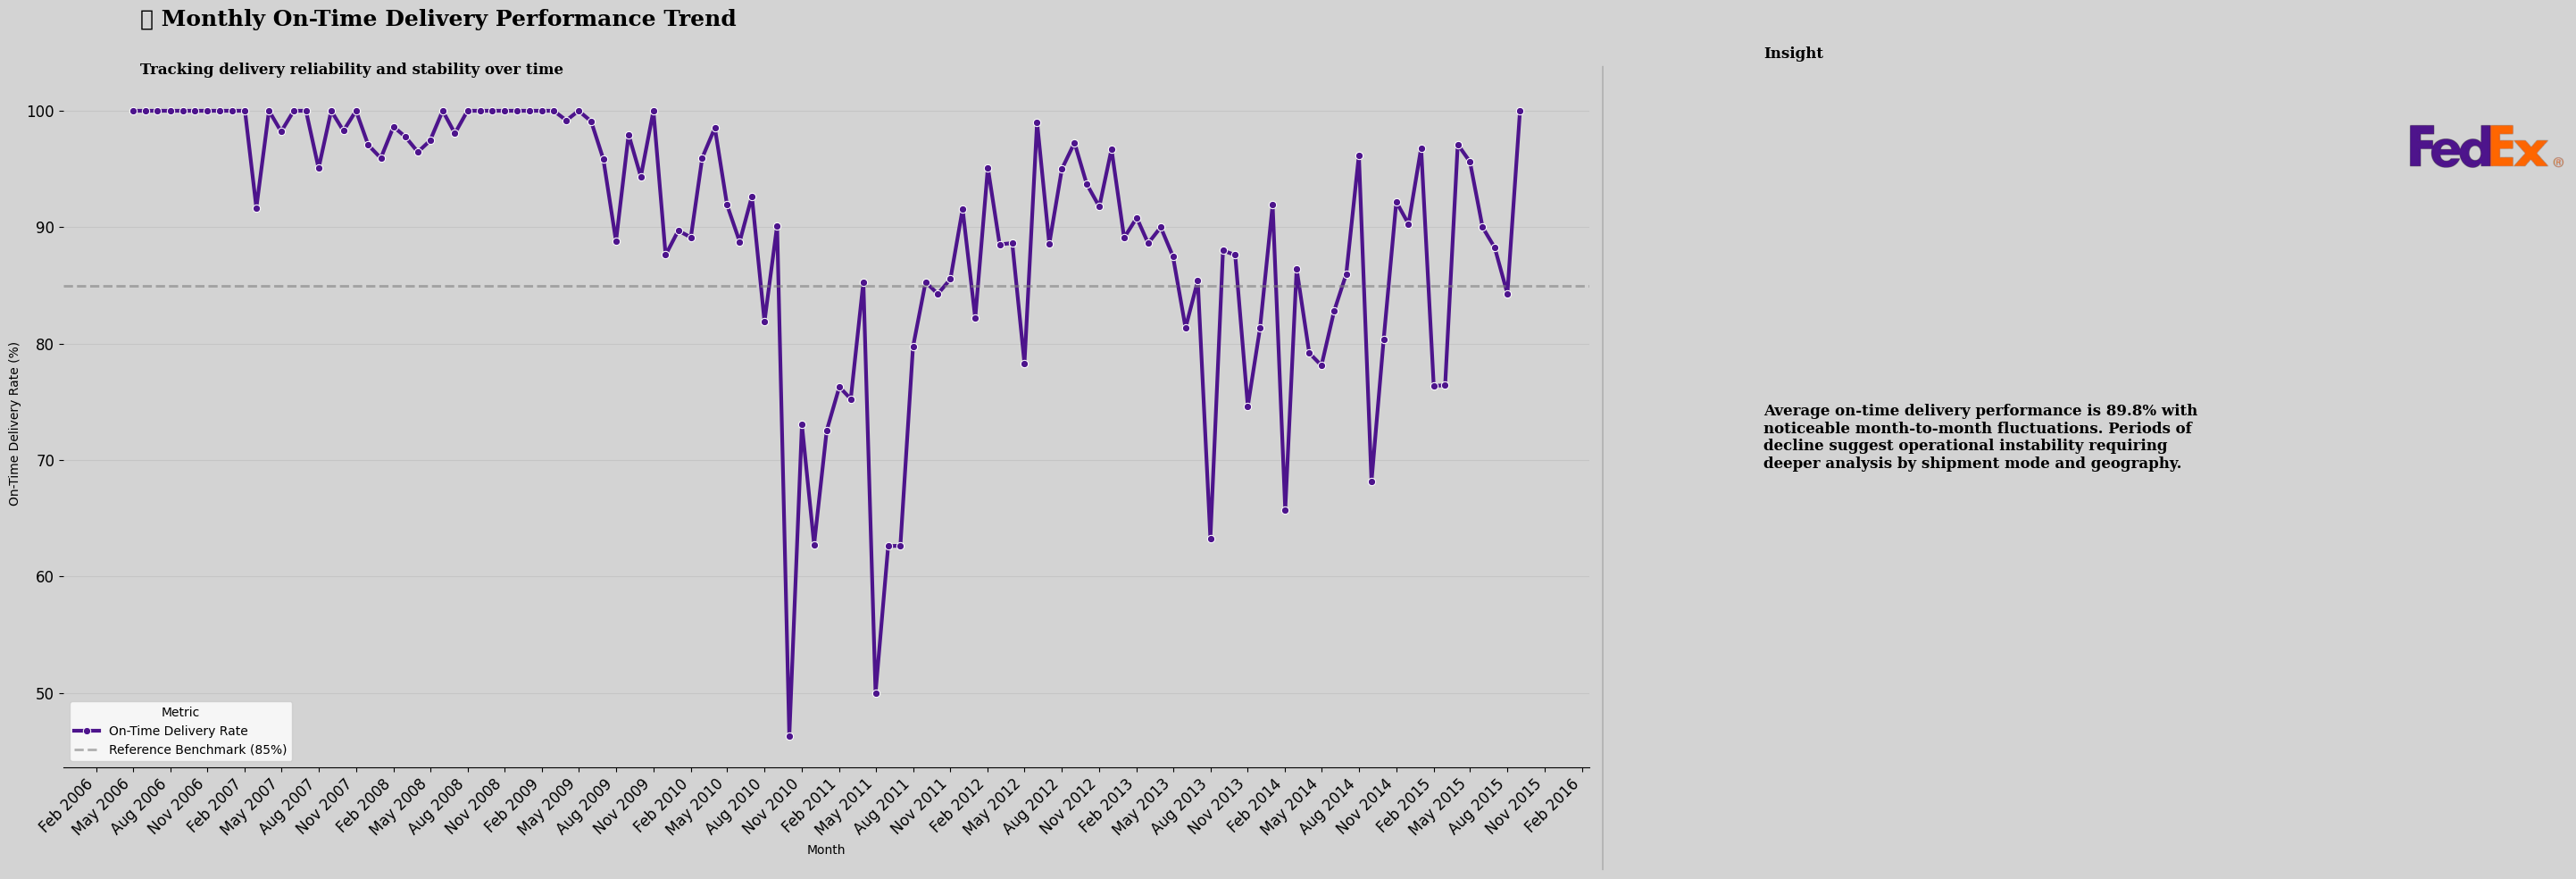

In [75]:
# 1. Data preparation
fed_ex['delivery_month'] = fed_ex['actual_delivery_date'].dt.to_period('M')
monthly_otd = (
    fed_ex
    .groupby('delivery_month')
    .agg(
        on_time_rate=('on_time_flag', 'mean'),
        shipment_count=('ID', 'nunique')
    )
    .reset_index()
)

monthly_otd['on_time_rate'] *= 100

avg_otd_rate = monthly_otd['on_time_rate'].mean()

# Convert 'delivery_month' from Period to Timestamp for plotting compatibility
monthly_otd['delivery_month'] = monthly_otd['delivery_month'].dt.to_timestamp()

# 2. Create figure
fig, ax = plt.subplots(figsize=(18, 9))

# 3. Plot
sns.lineplot(
    data=monthly_otd,
    x='delivery_month',
    y='on_time_rate',
    marker='o',
    linewidth=3,
    ax=ax,
    color=palette[0],
    label='On-Time Delivery Rate'
)

# SLA benchmark reference
ax.axhline(
    y=85,
    linestyle='--',
    linewidth=2,
    color='gray',
    alpha=0.6,
    label='Reference Benchmark (85%)'
)

# 4. Apply styling
apply_chart_styling(
    ax=ax,
    fig=fig,
    title='📈 Monthly On-Time Delivery Performance Trend',
    subtitle='Tracking delivery reliability and stability over time',
    insight_text=(
        f"Average on-time delivery performance is {avg_otd_rate:.1f}%\n"
        "with noticeable month-to-month fluctuations. "
        "Periods of decline suggest operational instability requiring "
        "deeper analysis by shipment mode and geography."
    )
)

# 5. Axis labels
ax.set_xlabel('Month')
ax.set_ylabel('On-Time Delivery Rate (%)')

# 6. Date formatting
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

ax.legend(title='Metric')

# 7. Layout
plt.tight_layout()
plt.show()

### 🚚 Section 2: Delivery Reliability Analysis


#### On-Time Delivery % by Shipment Mode

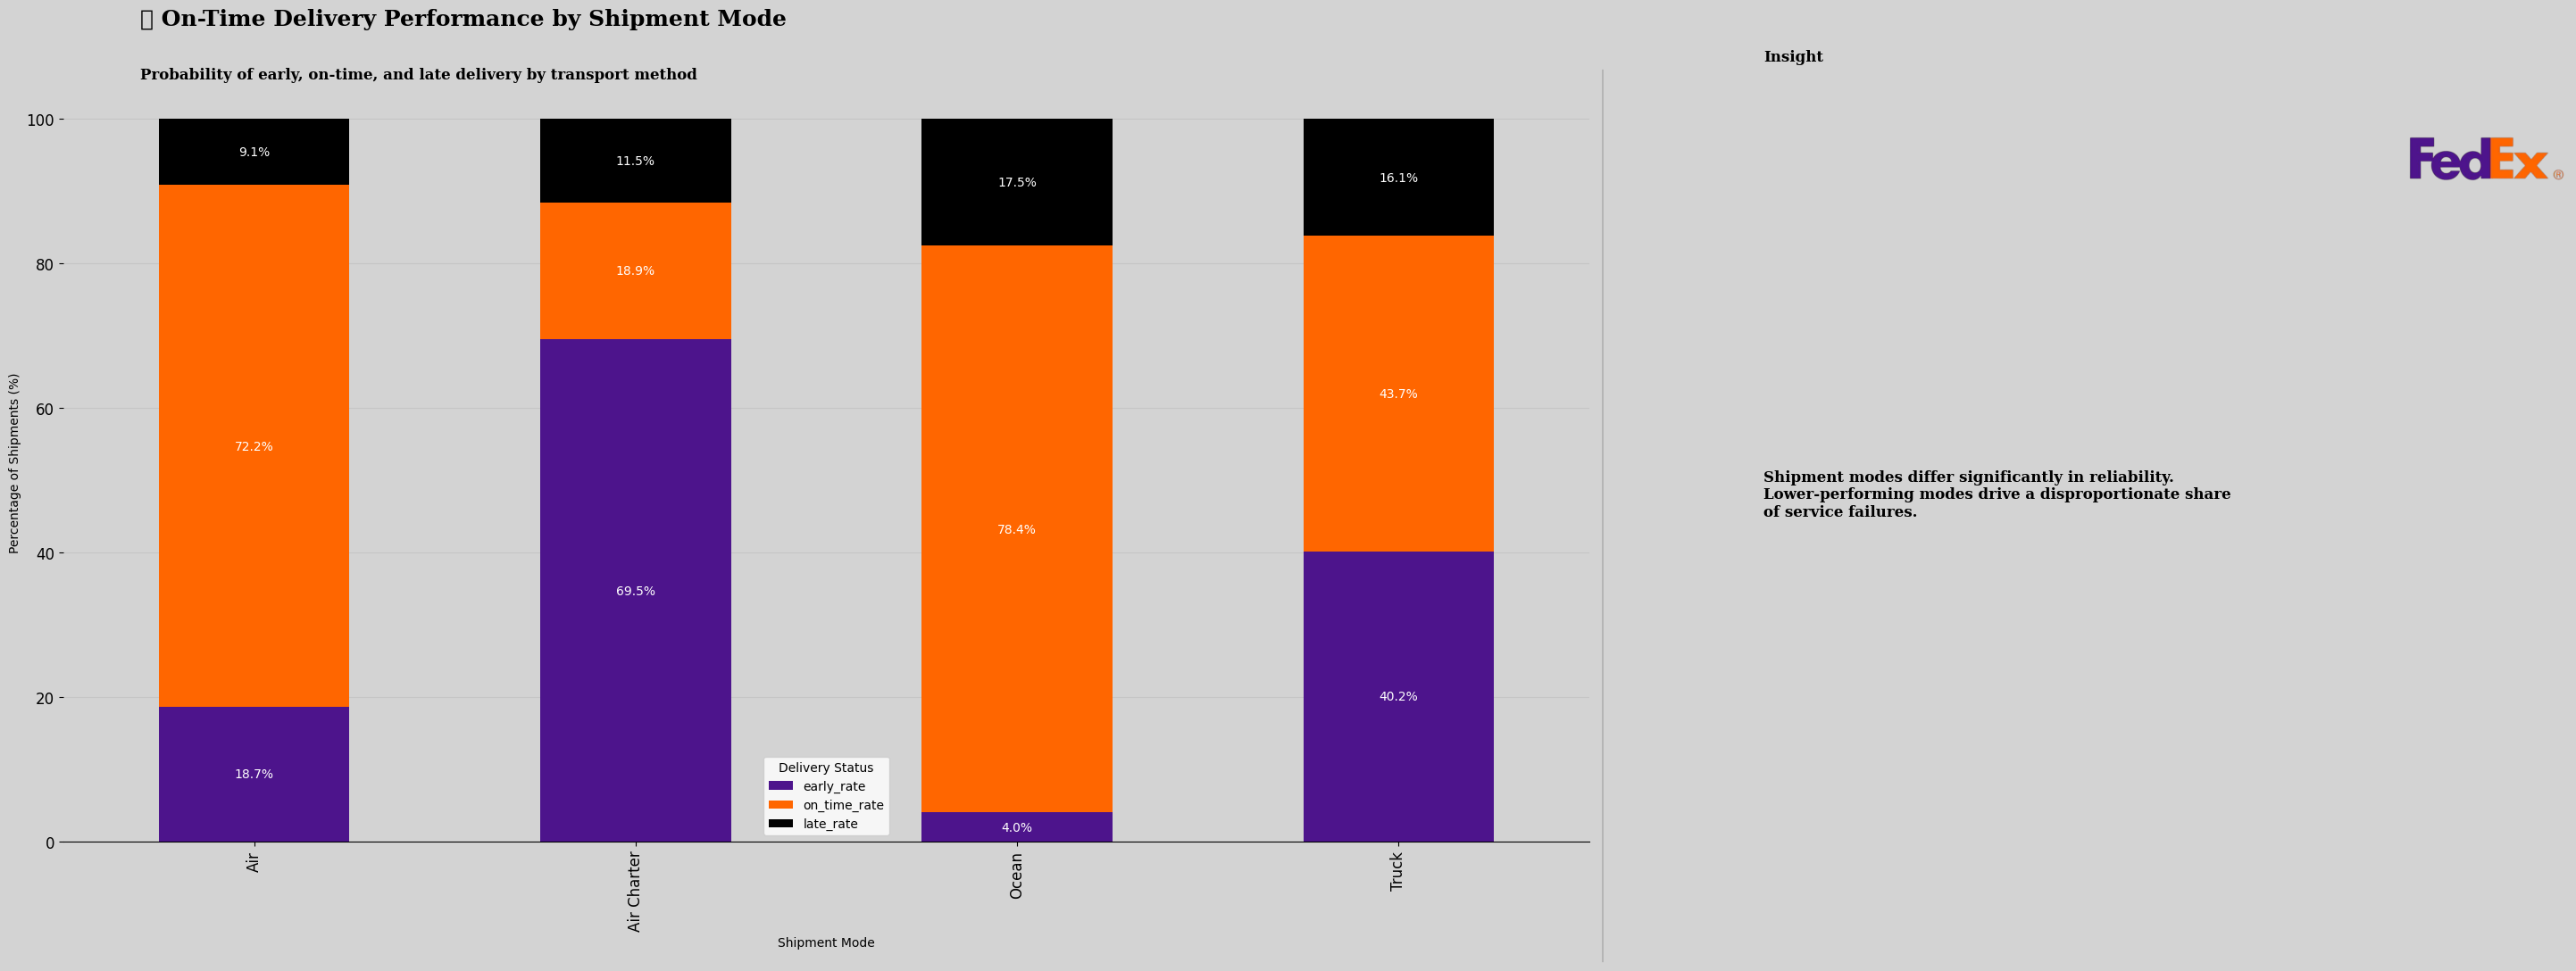

In [76]:
# 1. Data preparation
mode_otd = (
    fed_ex
    .groupby('Shipment Mode')
    .agg(
        early_rate=('delivery_status', lambda x: (x == 'Early').mean()),
        on_time_rate=('delivery_status', lambda x: (x == 'On-Time').mean()),
        late_rate=('delivery_status', lambda x: (x == 'Late').mean()),
        shipment_count=('ID', 'nunique')
    )
    .reset_index()
)

mode_otd[['early_rate', 'on_time_rate', 'late_rate']] *= 100

mode_otd_plot = mode_otd.set_index('Shipment Mode')[
    ['early_rate', 'on_time_rate', 'late_rate']
]

# 2. Create figure
fig, ax = plt.subplots(figsize=(18, 10))

# 3. Plot
bars = mode_otd_plot.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=palette[:3]
)

# Add percentage labels
for container in bars.containers:
    labels = [
        f'{value:.1f}%' if value > 0 else ''
        for value in container.datavalues
    ]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='white')

# 4. Apply styling
apply_chart_styling(
    ax=ax,
    fig=fig,
    title='🚚 On-Time Delivery Performance by Shipment Mode',
    subtitle='Probability of early, on-time, and late delivery by transport method',
    insight_text=(
        "Shipment modes differ significantly in reliability. "
        "Lower-performing modes drive a disproportionate share of service failures."
    )
)

# 5. Axis labels
ax.set_xlabel('Shipment Mode')
ax.set_ylabel('Percentage of Shipments (%)')
ax.legend(title='Delivery Status')

# 6. Layout
plt.tight_layout()
plt.show()


#### Delay Severity Distribution by Shipment Mode

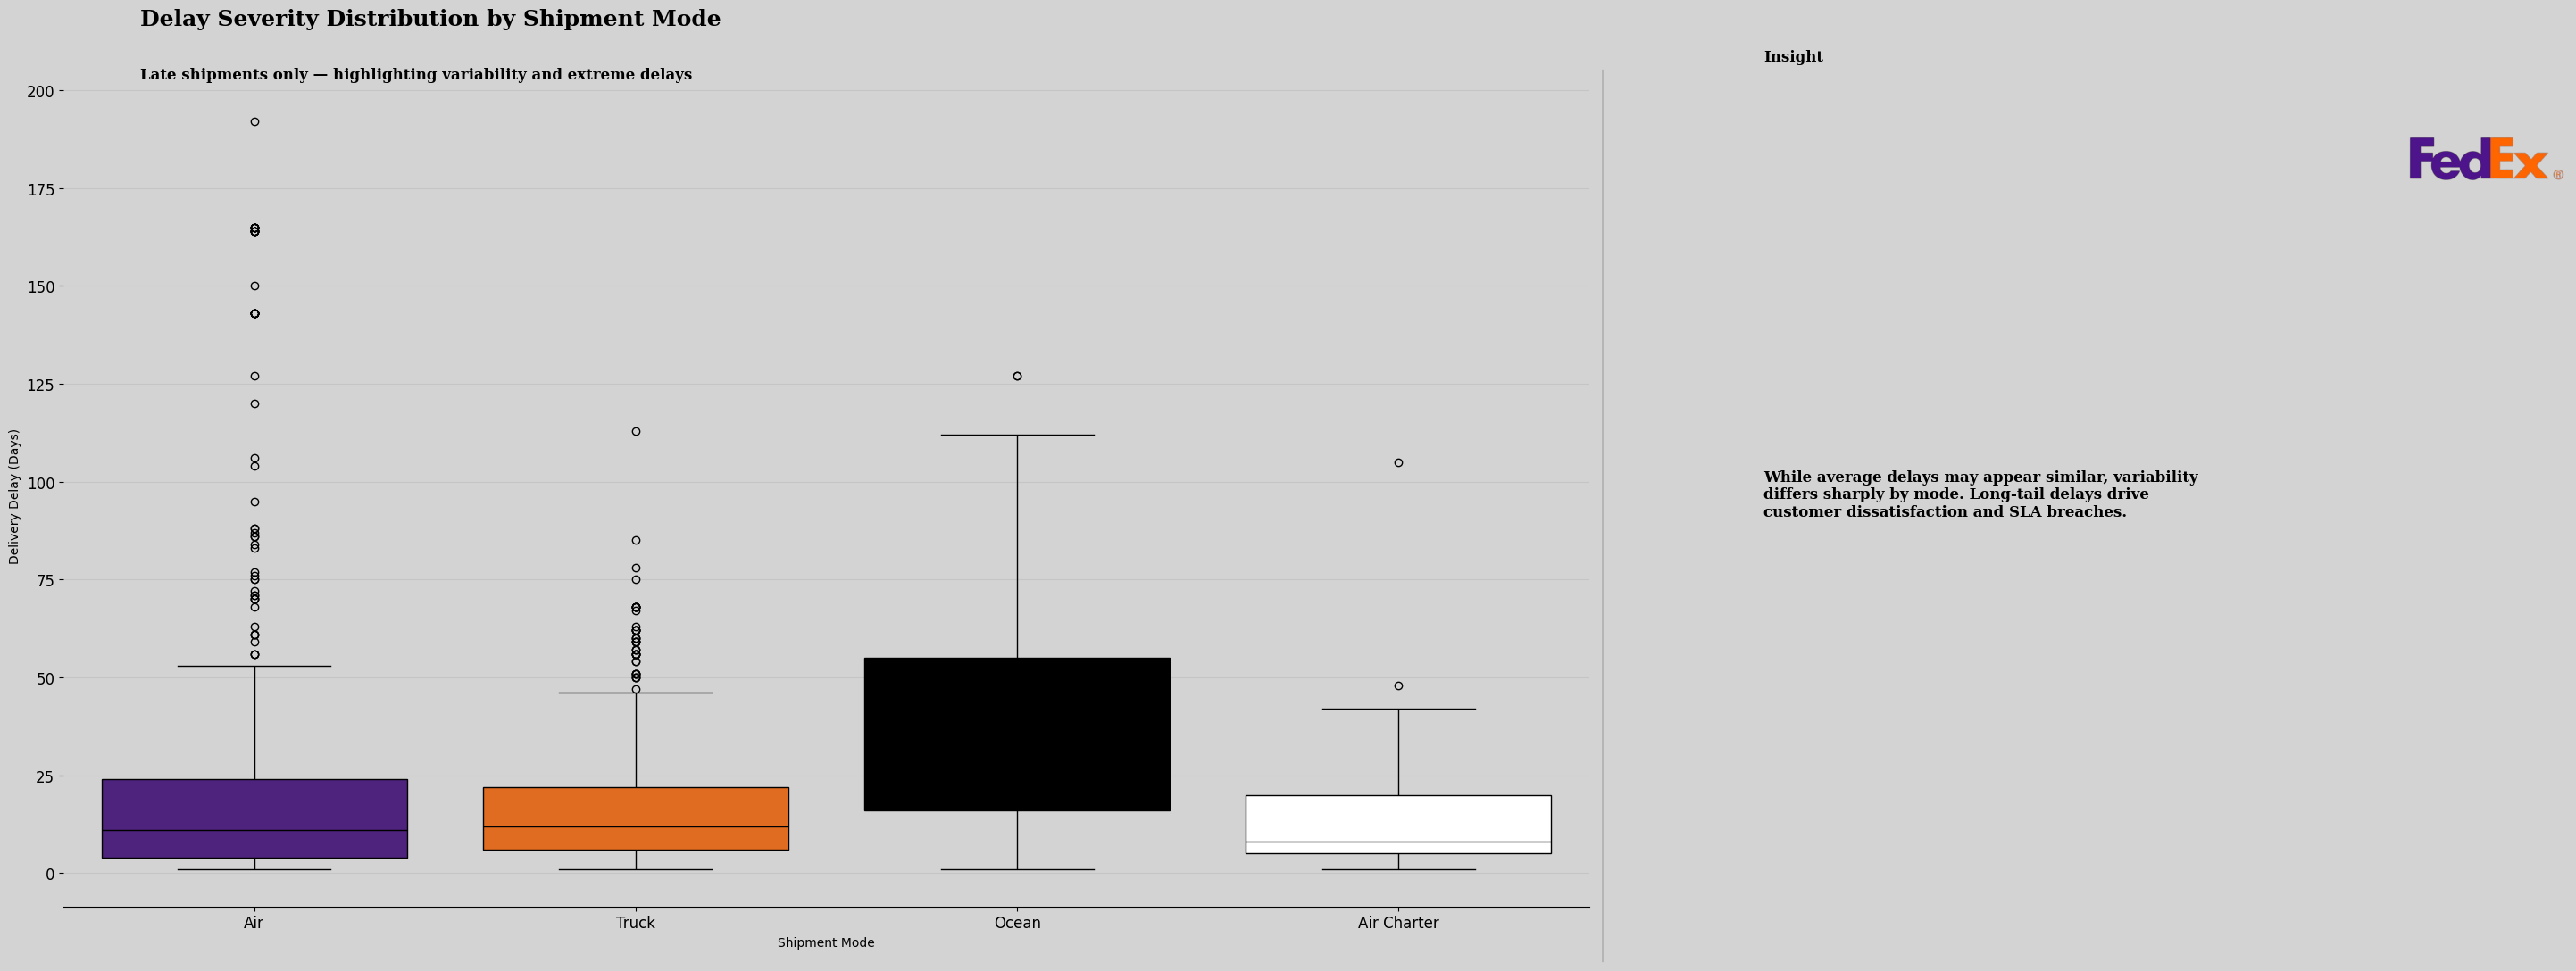

In [77]:

# Filter the DataFrame to include only late shipment
late_shipments = fed_ex[fed_ex['delivery_delay_days'] > 0]

# Create a figure,axes for the plot
fig, ax = plt.subplots(figsize=(18, 10))

sns.boxplot(
    data=late_shipments,
    x='Shipment Mode',
    y='delivery_delay_days',
    palette=palette,
    showfliers=True,
    ax=ax
)

# Apply custom styling to the chart
apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Delay Severity Distribution by Shipment Mode',
    subtitle='Late shipments only — highlighting variability and extreme delays',
    insight_text=(
        "While average delays may appear similar, variability differs sharply by mode. "
        "Long-tail delays drive customer dissatisfaction and SLA breaches."
    )
)

# Set the x,y label
ax.set_xlabel('Shipment Mode')
ax.set_ylabel('Delivery Delay (Days)')

# Adjust layout
plt.tight_layout()
plt.show()

#### Delay Severity Heatmap by Shipment Mode

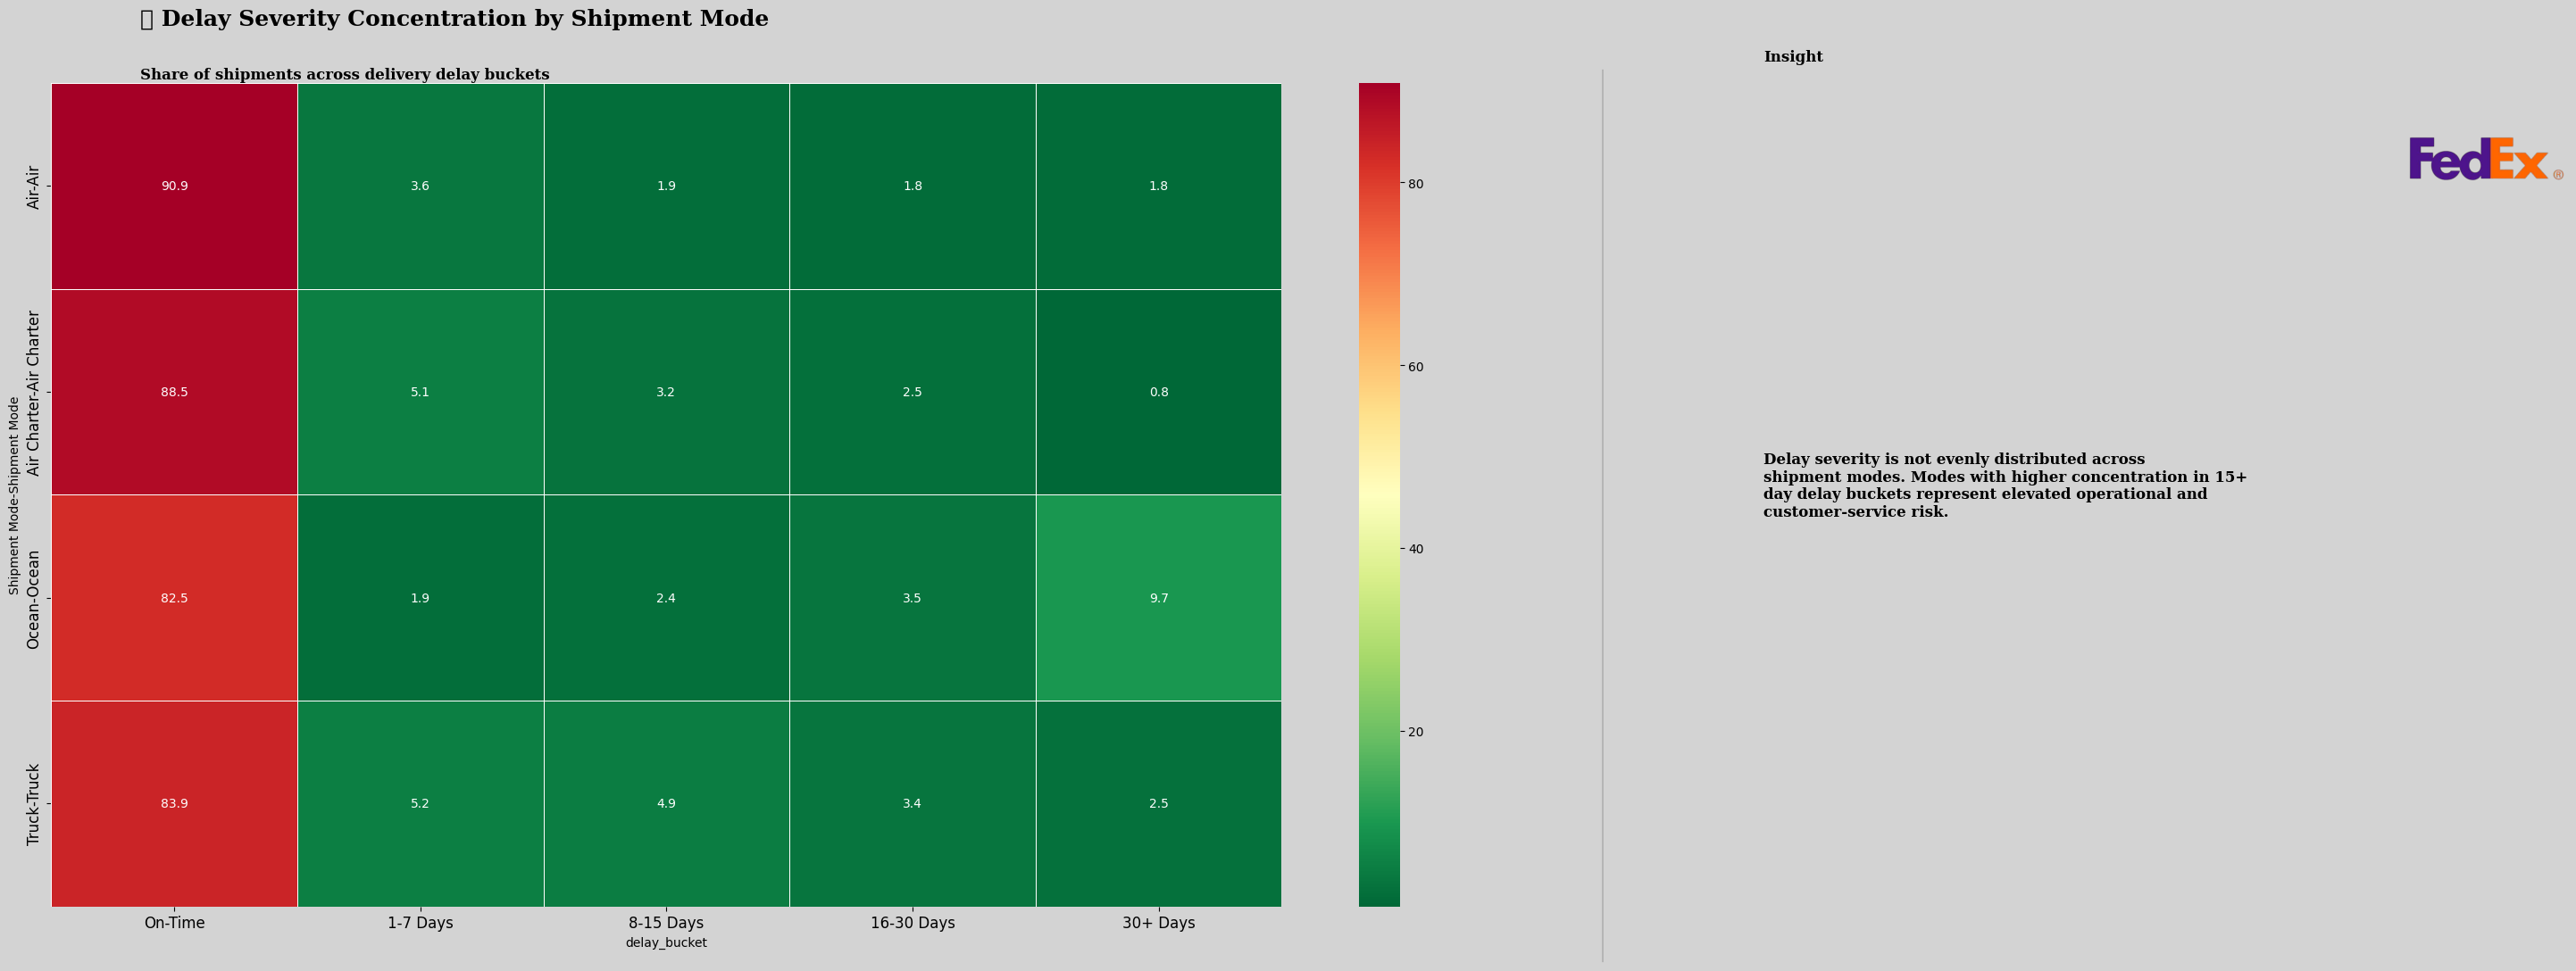

In [78]:
# 1. Data preparation
# Create delay_bucket column
bins = [-float('inf'), 0, 7, 15, 30, float('inf')]
labels = ['On-Time', '1-7 Days', '8-15 Days', '16-30 Days', '30+ Days']
fed_ex['delay_bucket'] = pd.cut(
    fed_ex['delivery_delay_days'],
    bins=bins,
    labels=labels,
    right=True
)

delay_heatmap = (
    fed_ex
    .groupby(['Shipment Mode', 'delay_bucket'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)
)

# Ensure consistent delay bucket order
delay_bucket_order = [
    'On-Time',
    '1-7 Days',
    '8-15 Days',
    '16-30 Days',
    '30+ Days'
]

heatmap_data = delay_heatmap[
    [col for col in delay_bucket_order if col in delay_heatmap.columns]
]

# 2. Create figure
fig, ax = plt.subplots(figsize=(18, 10))

# 3. Plot
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.1f',
    cmap='RdYlGn_r',
    linewidths=0.5,
    ax=ax
)

# 4. Apply styling
apply_chart_styling(
    ax=ax,
    fig=fig,
    title='🔥 Delay Severity Concentration by Shipment Mode',
    subtitle='Share of shipments across delivery delay buckets',
    insight_text=(
        "Delay severity is not evenly distributed across shipment modes. "
        "Modes with higher concentration in 15+ day delay buckets represent "
        "elevated operational and customer-service risk."
    )
)

# 5. Layout
plt.tight_layout()
plt.show()

#### Countries with Highest Delay Impact

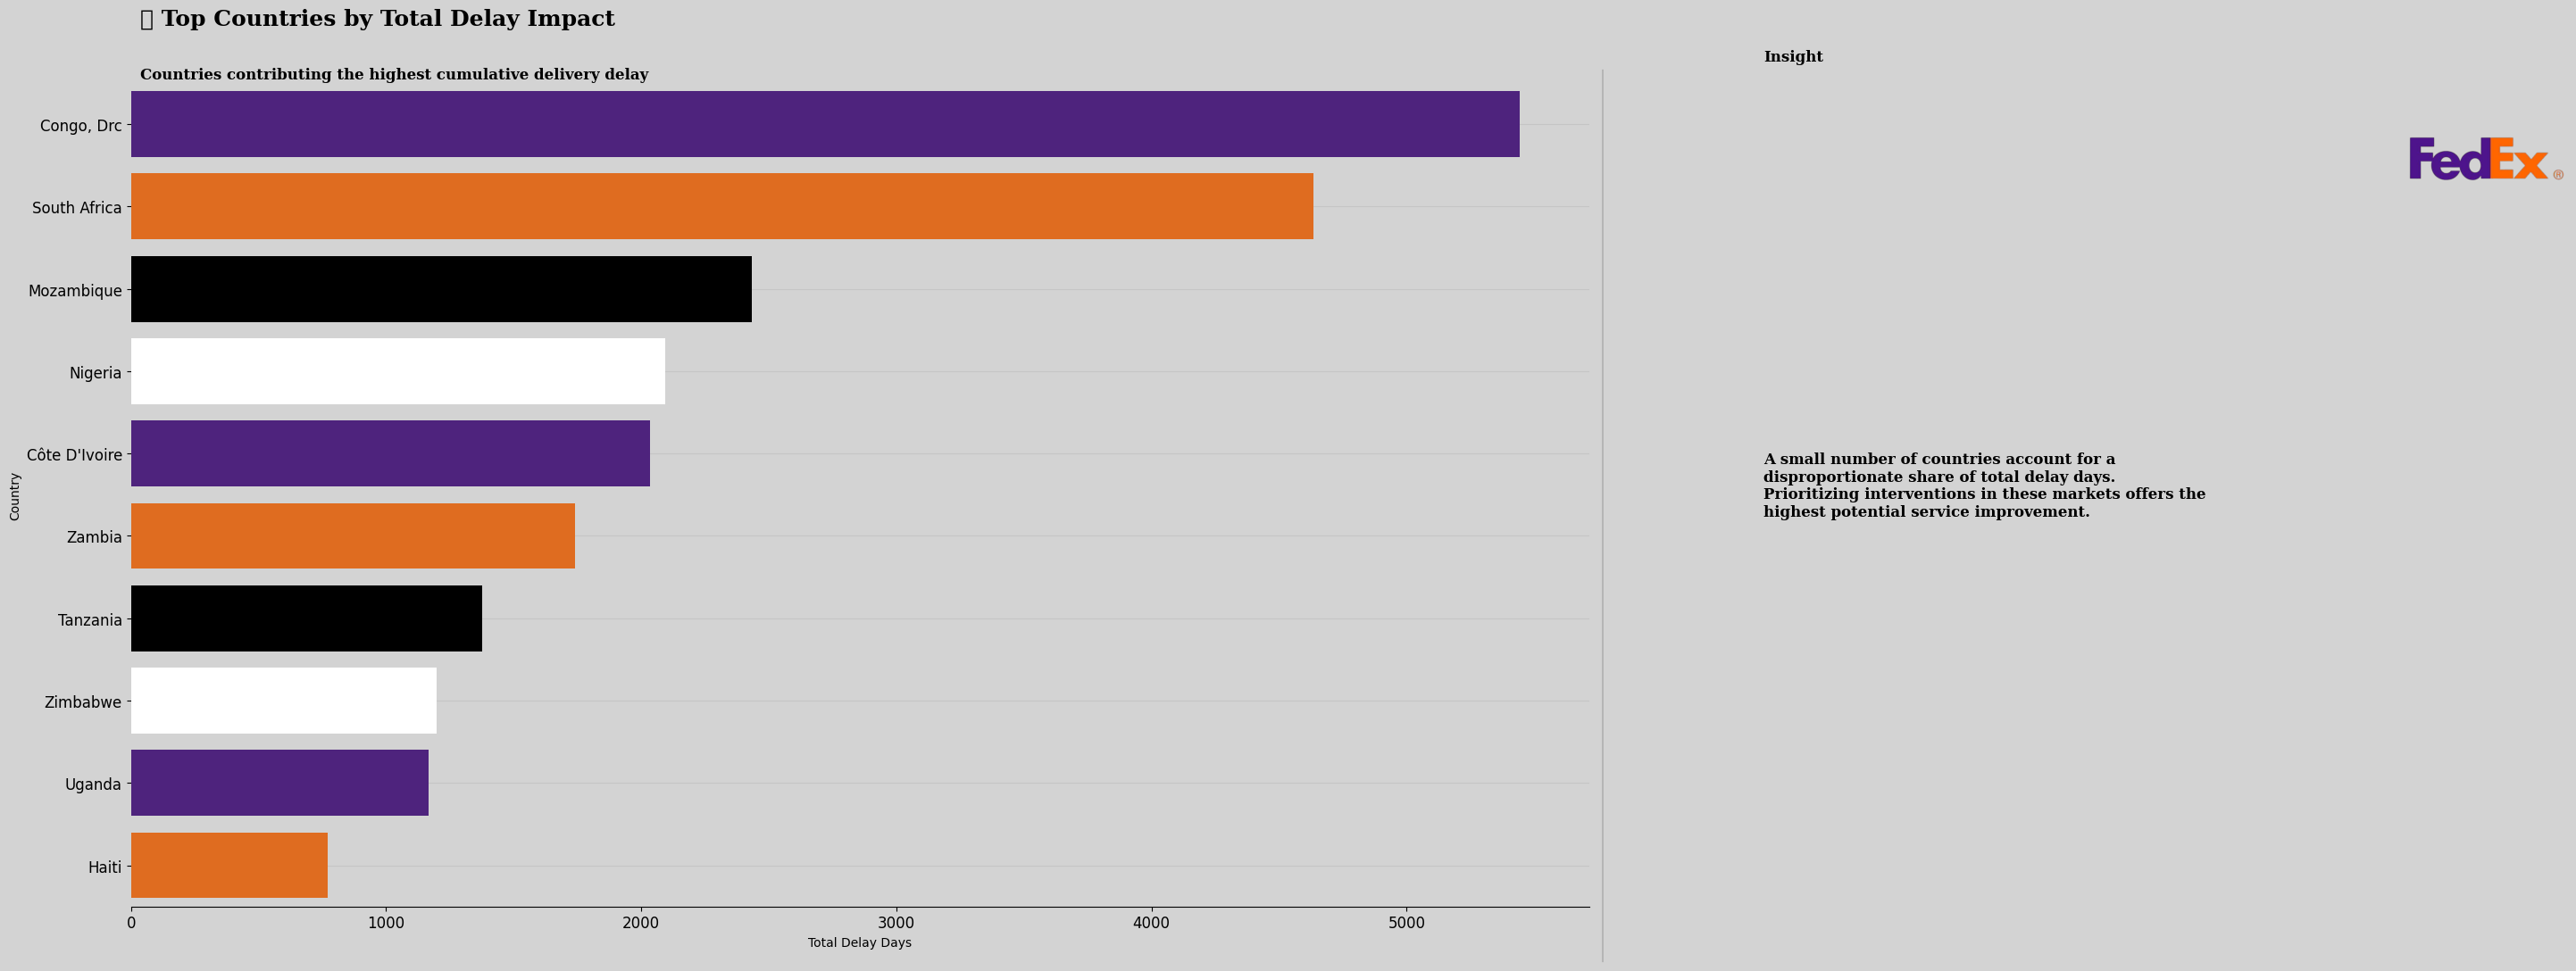

In [79]:
# 1. Data preparation
country_delay = (
    fed_ex[fed_ex['delivery_delay_days'] > 0]
    .groupby('Country')
    .agg(
        avg_delay=('delivery_delay_days', 'mean'),
        total_delay_days=('delivery_delay_days', 'sum'),
        shipment_count=('ID', 'nunique')
    )
    .reset_index()
)

# Filter to statistically meaningful volume
country_delay = country_delay[country_delay['shipment_count'] >= 50]

# Select top 10 countries by cumulative delay impact
top_countries = (
    country_delay
    .sort_values('total_delay_days', ascending=False)
    .head(10)
)

# 2. Create figure
fig, ax = plt.subplots(figsize=(18, 10))

# 3. Plot
sns.barplot(
    data=top_countries,
    x='total_delay_days',
    y='Country',
    palette=palette,
    ax=ax
)

# 4. Apply styling
apply_chart_styling(
    ax=ax,
    fig=fig,
    title='🌍 Top Countries by Total Delay Impact',
    subtitle='Countries contributing the highest cumulative delivery delay',
    insight_text=(
        "A small number of countries account for a disproportionate share "
        "of total delay days. Prioritizing interventions in these markets "
        "offers the highest potential service improvement."
    )
)

# 5. Axis labels
ax.set_xlabel('Total Delay Days')
ax.set_ylabel('Country')

# 6. Layout
plt.tight_layout()
plt.show()

### 💰Section 3: Cost-to-Serve Analysis


#### Freight Cost per Kilogram by Shipment Mode

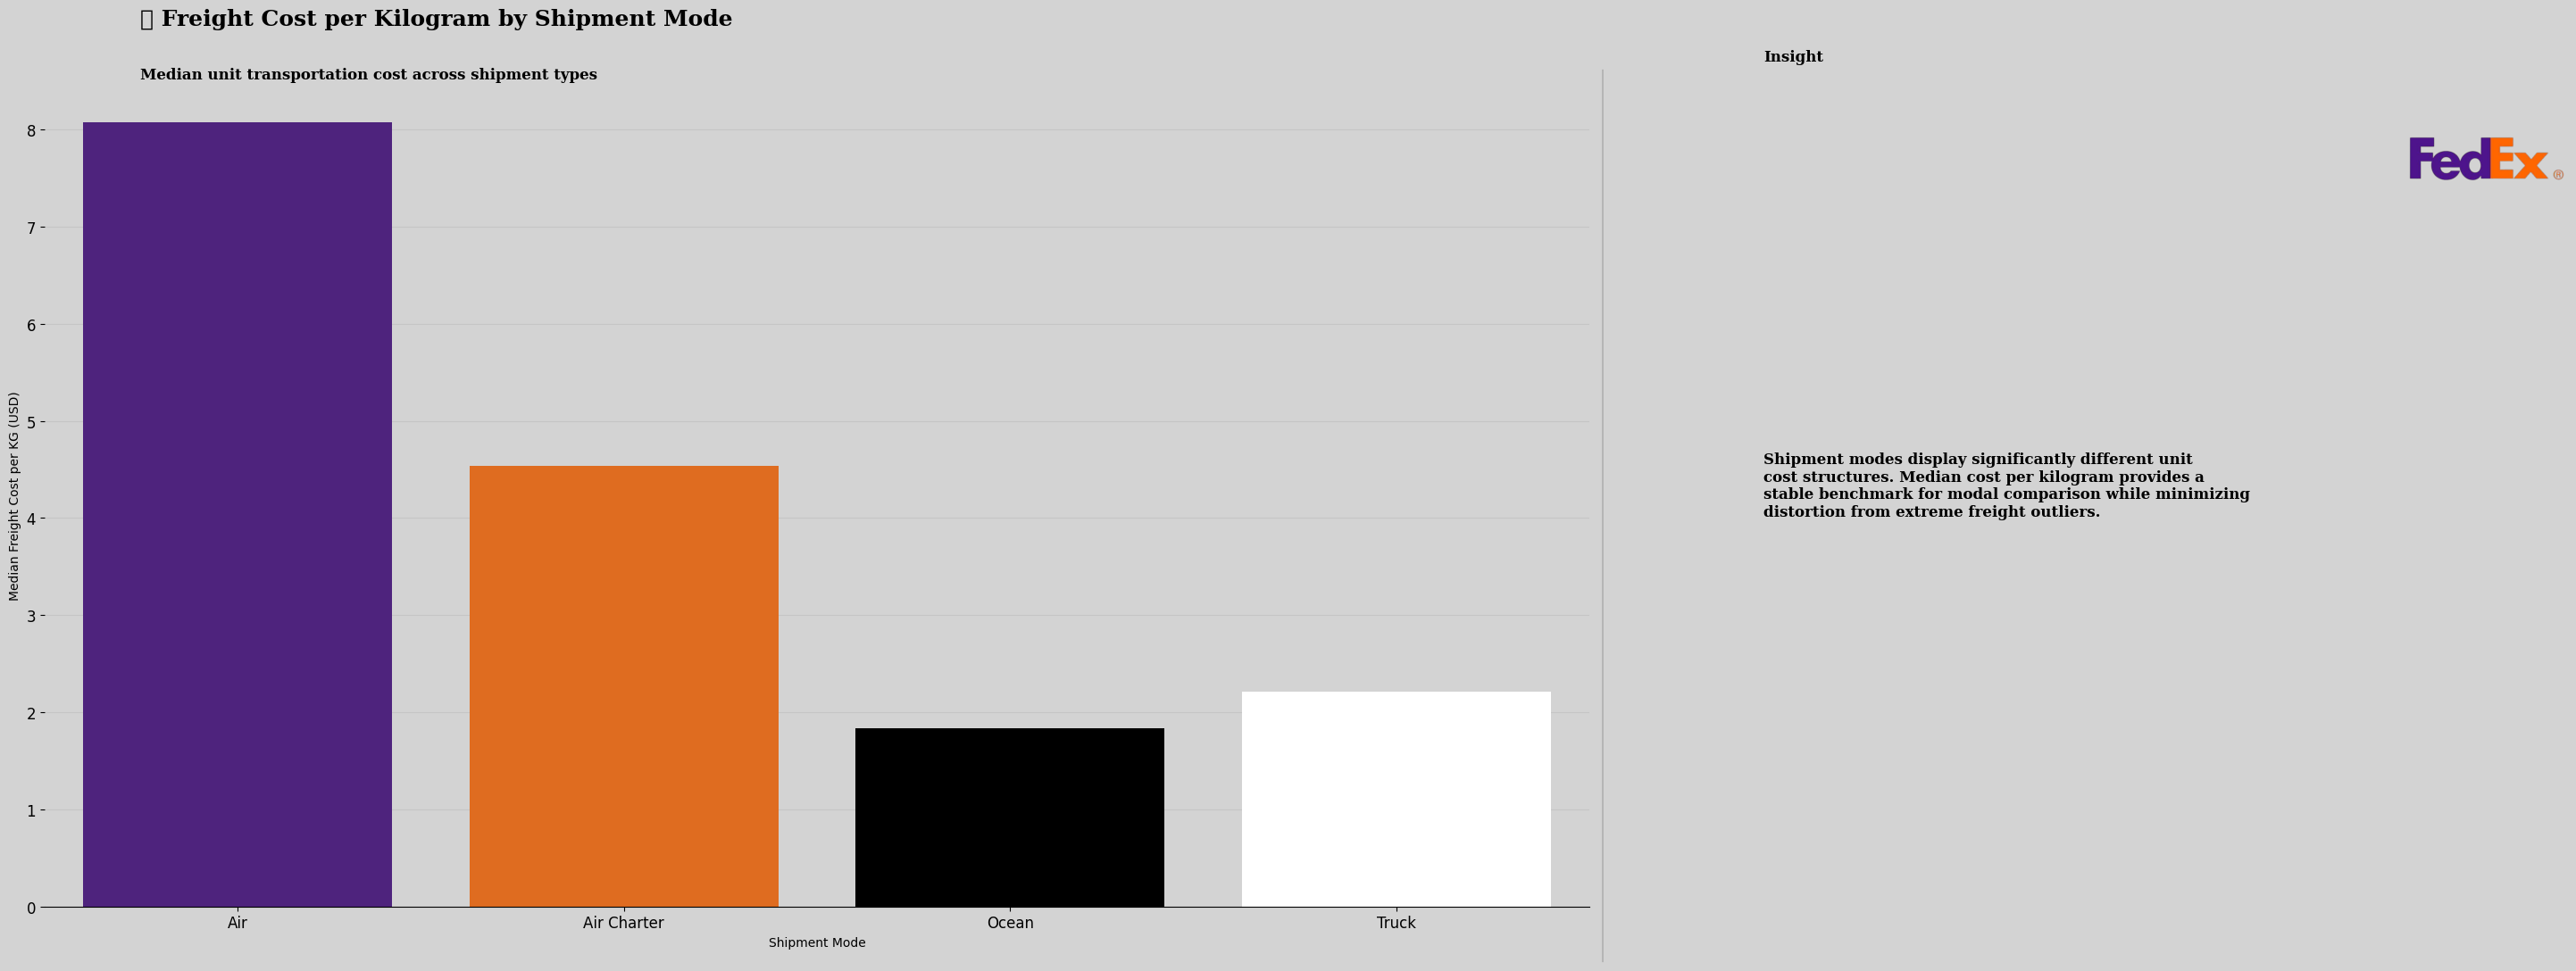

In [80]:
# 1. Data preparation
cost_per_kg_mode = (
    fed_ex
    .groupby('Shipment Mode')
    .agg(
        median_cost_per_kg=('freight_cost_per_kg', 'median'),
        shipment_count=('ID', 'nunique')
    )
    .reset_index()
)

# 2. Create figure
fig, ax = plt.subplots(figsize=(18, 10))

# 3. Plot
sns.barplot(
    data=cost_per_kg_mode,
    x='Shipment Mode',
    y='median_cost_per_kg',
    palette=palette,
    ax=ax
)

# 4. Apply styling
apply_chart_styling(
    ax=ax,
    fig=fig,
    title='💰 Freight Cost per Kilogram by Shipment Mode',
    subtitle='Median unit transportation cost across shipment types',
    insight_text=(
        "Shipment modes display significantly different unit cost structures. "
        "Median cost per kilogram provides a stable benchmark for modal "
        "comparison while minimizing distortion from extreme freight outliers."
    )
)

# 5. Axis labels
ax.set_xlabel('Shipment Mode')
ax.set_ylabel('Median Freight Cost per KG (USD)')

# 6. Layout
plt.tight_layout()
plt.show()

#### Freight Cost Variability by Shipment Mode

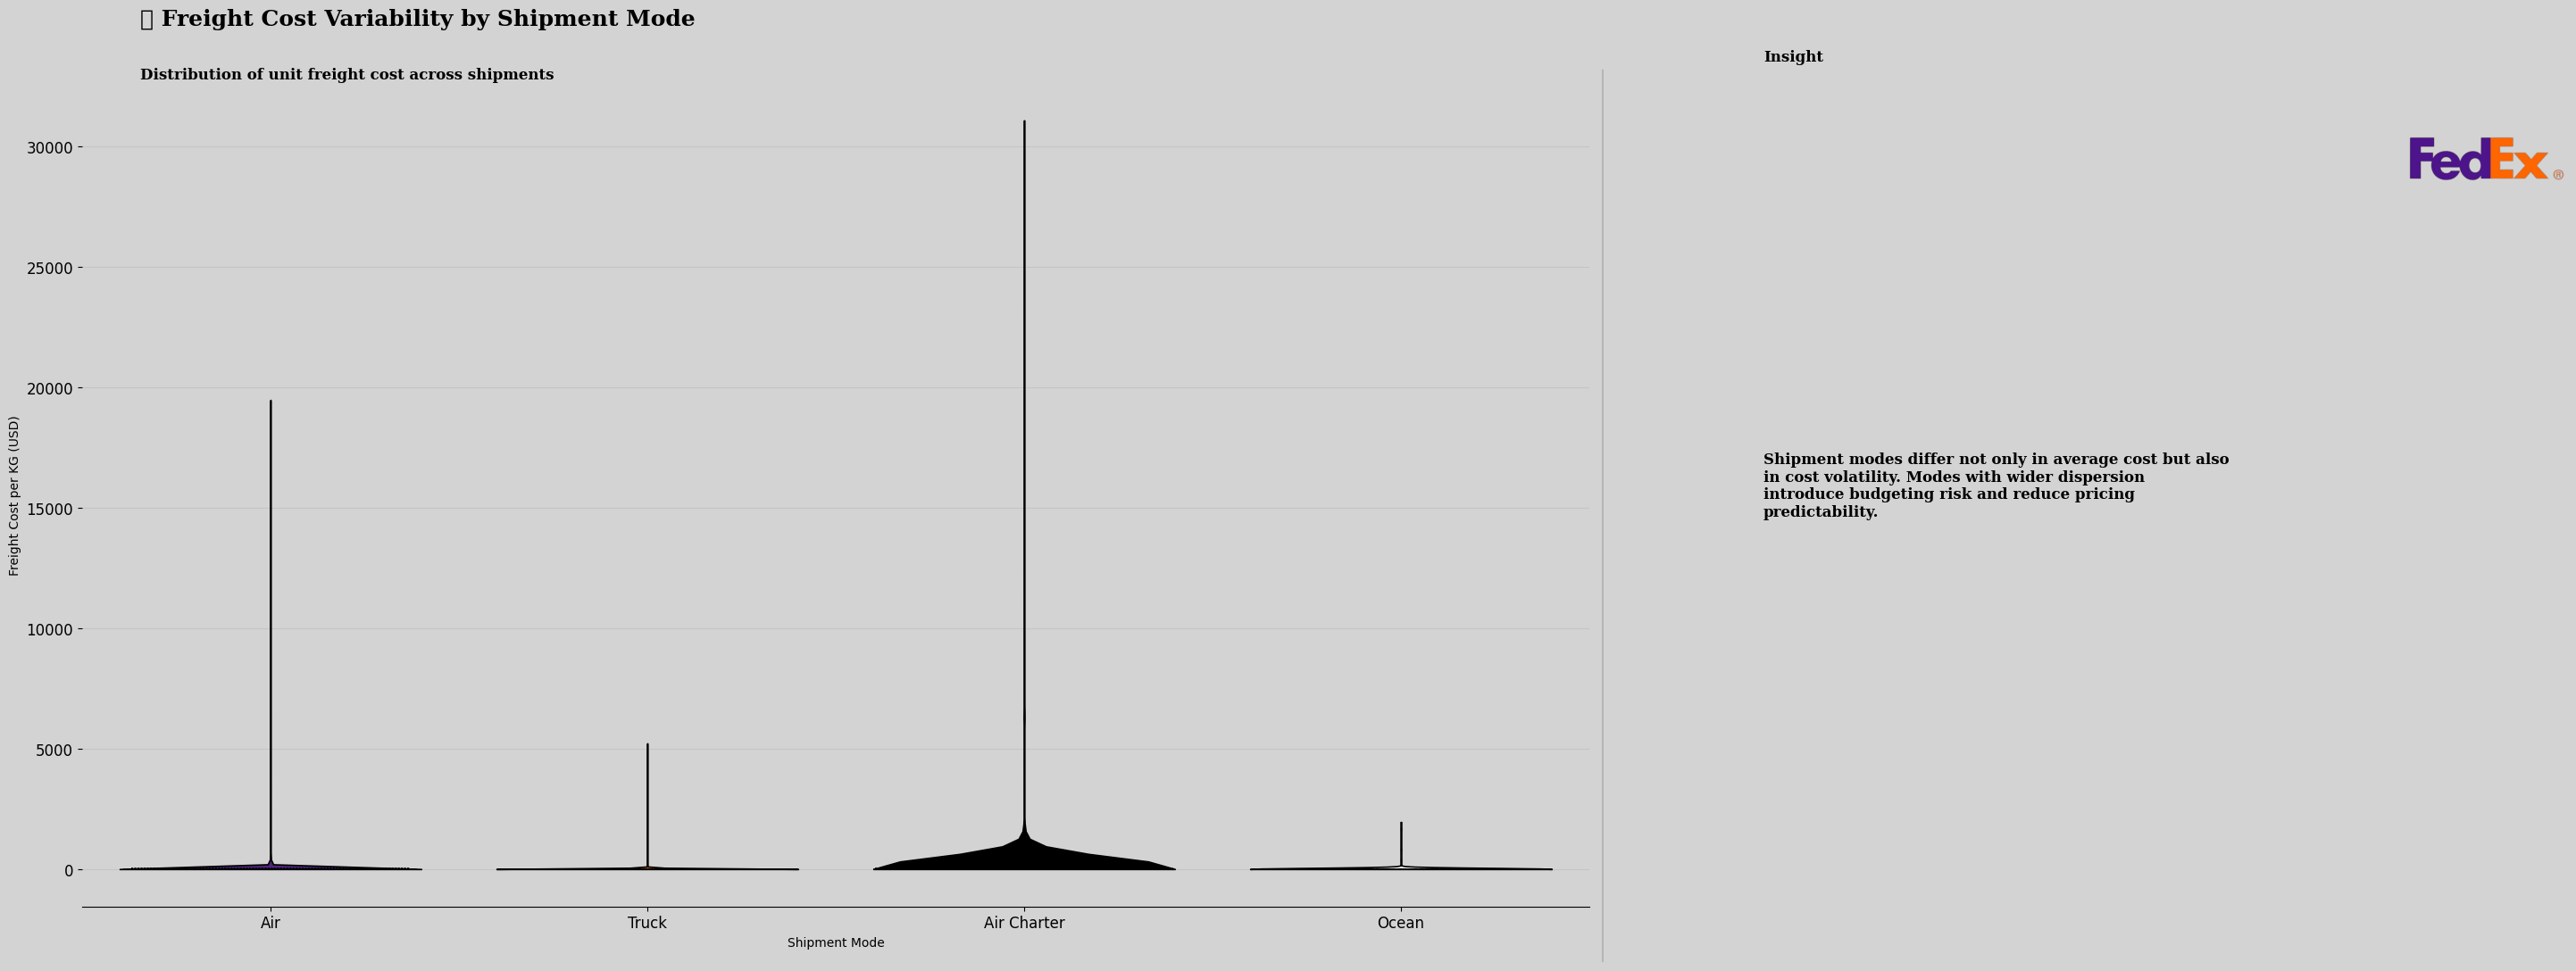

In [81]:
# 1. Create figure
fig, ax = plt.subplots(figsize=(18, 10))

# 2. Plot
sns.violinplot(
    data=fed_ex,
    x='Shipment Mode',
    y='freight_cost_per_kg',
    palette=palette,
    inner='quartile',
    cut=0,
    ax=ax
)

# 3. Apply styling
apply_chart_styling(
    ax=ax,
    fig=fig,
    title='📊 Freight Cost Variability by Shipment Mode',
    subtitle='Distribution of unit freight cost across shipments',
    insight_text=(
        "Shipment modes differ not only in average cost but also in cost volatility. "
        "Modes with wider dispersion introduce budgeting risk and reduce "
        "pricing predictability."
    )
)

# 4. Axis labels
ax.set_xlabel('Shipment Mode')
ax.set_ylabel('Freight Cost per KG (USD)')

# 5. Layout
plt.tight_layout()
plt.show()


#### Freight Cost as Percentage of Shipment Value

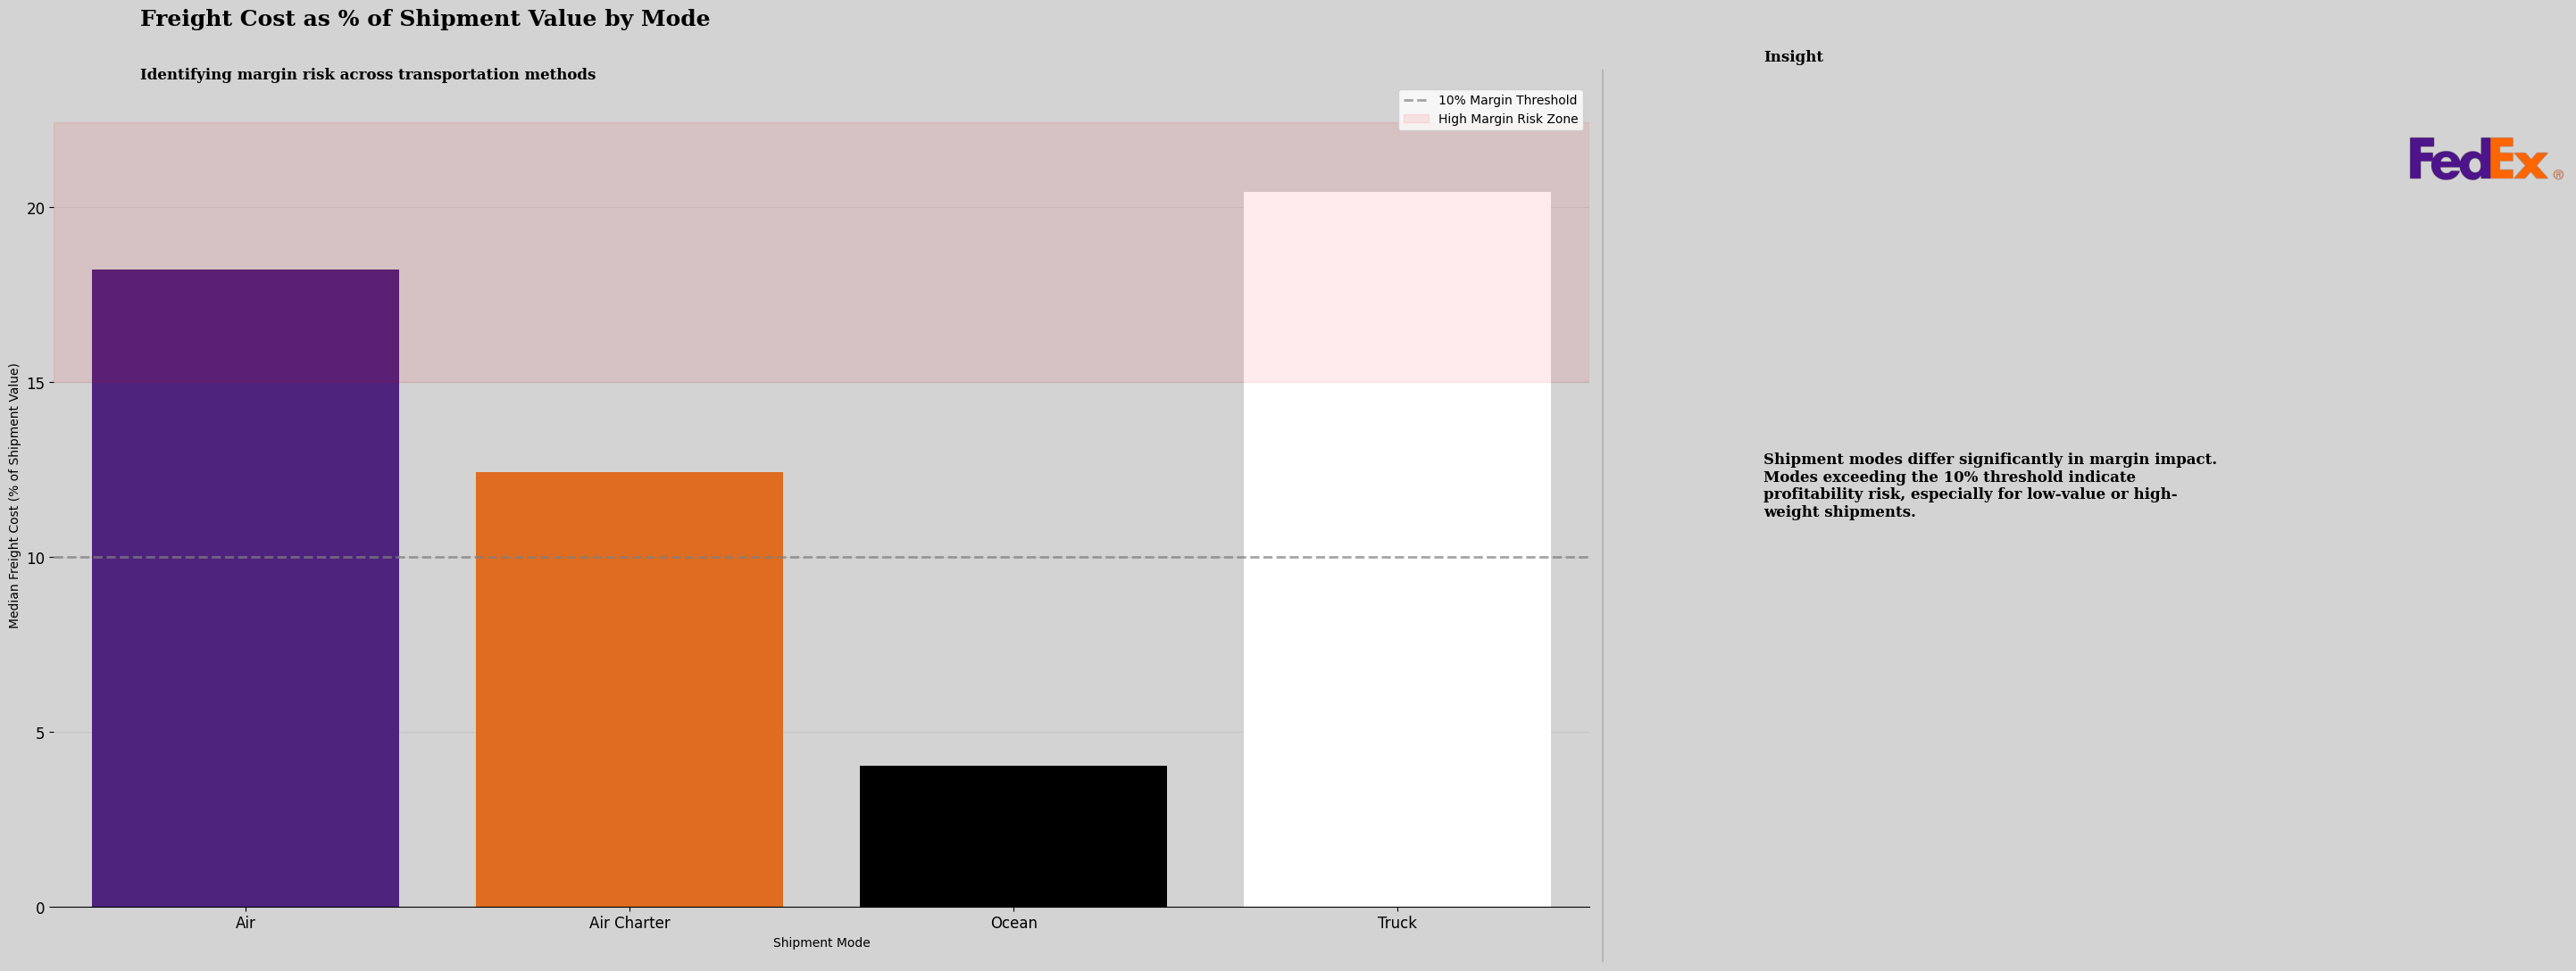

In [82]:
# 1. Data preparation
cost_pct_mode = (
    fed_ex
    .groupby('Shipment Mode')
    .agg(
        median_cost_pct=('freight_cost_pct_value', 'median'),
        shipment_count=('ID', 'nunique')
    )
    .reset_index()
)

# 2. Create figure
fig, ax = plt.subplots(figsize=(18, 10))

# 3. Plot
sns.barplot(
    data=cost_pct_mode,
    x='Shipment Mode',
    y='median_cost_pct',
    palette=palette,
    ax=ax
)

# 4. Benchmark line (10% margin threshold)
ax.axhline(
    y=10,
    linestyle='--',
    linewidth=2,
    color='gray',
    alpha=0.7,
    label='10% Margin Threshold'
)

# Optional danger zone (15%+)
ax.axhspan(
    15,
    cost_pct_mode['median_cost_pct'].max() + 2,
    color='red',
    alpha=0.08,
    label='High Margin Risk Zone'
)

# 5. Styling
apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Freight Cost as % of Shipment Value by Mode',
    subtitle='Identifying margin risk across transportation methods',
    insight_text=(
        "Shipment modes differ significantly in margin impact. "
        "Modes exceeding the 10% threshold indicate profitability risk, "
        "especially for low-value or high-weight shipments."
    )
)

# 6. Axis labels
ax.set_xlabel('Shipment Mode')
ax.set_ylabel('Median Freight Cost (% of Shipment Value)')

ax.legend()

plt.tight_layout()
plt.show()

#### Freight Cost vs Shipment Value

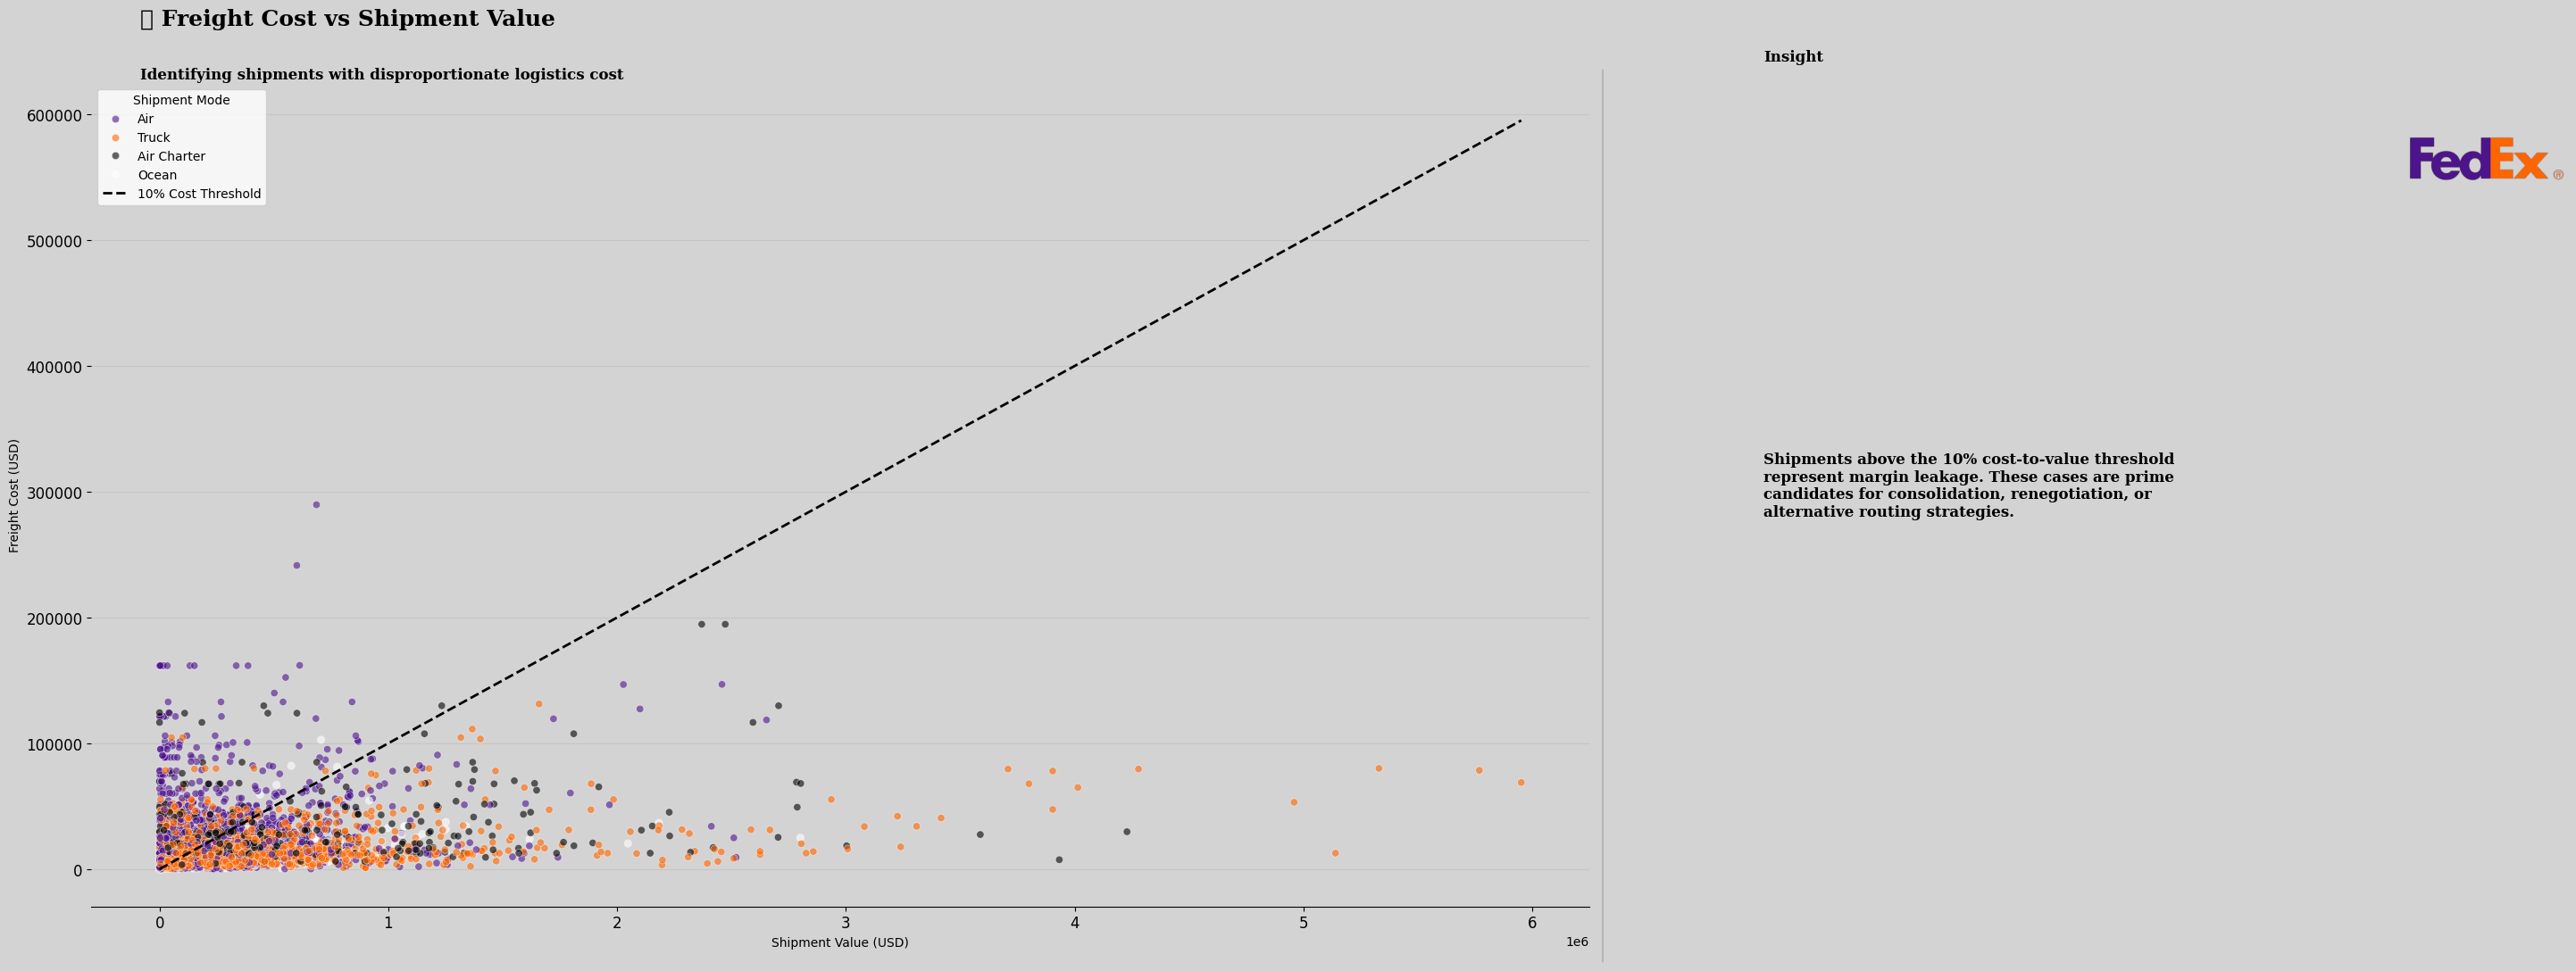

In [83]:
# 1. Create figure
fig, ax = plt.subplots(figsize=(18, 10))

# 2. Plot
sns.scatterplot(
    data=fed_ex,
    x='line_item_value',
    y='freight_cost_usd',
    hue='Shipment Mode',
    palette=palette,
    alpha=0.6,
    ax=ax
)

# Reference 10% cost-to-value threshold
x_vals = np.linspace(
    fed_ex['line_item_value'].min(),
    fed_ex['line_item_value'].max(),
    100
)

ax.plot(
    x_vals,
    0.10 * x_vals,
    linestyle='--',
    color='black',
    linewidth=2,
    label='10% Cost Threshold'
)

# 3. Apply styling
apply_chart_styling(
    ax=ax,
    fig=fig,
    title='📉 Freight Cost vs Shipment Value',
    subtitle='Identifying shipments with disproportionate logistics cost',
    insight_text=(
        "Shipments above the 10% cost-to-value threshold represent margin leakage. "
        "These cases are prime candidates for consolidation, renegotiation, "
        "or alternative routing strategies."
    )
)

# 4. Axis labels
ax.set_xlabel('Shipment Value (USD)')
ax.set_ylabel('Freight Cost (USD)')
ax.legend(title='Shipment Mode')

# 5. Layout
plt.tight_layout()
plt.show()

### ⚖️ Section 4: Speed vs Cost Trade Off


#### Speed–Cost Trade-off by Shipment Mode

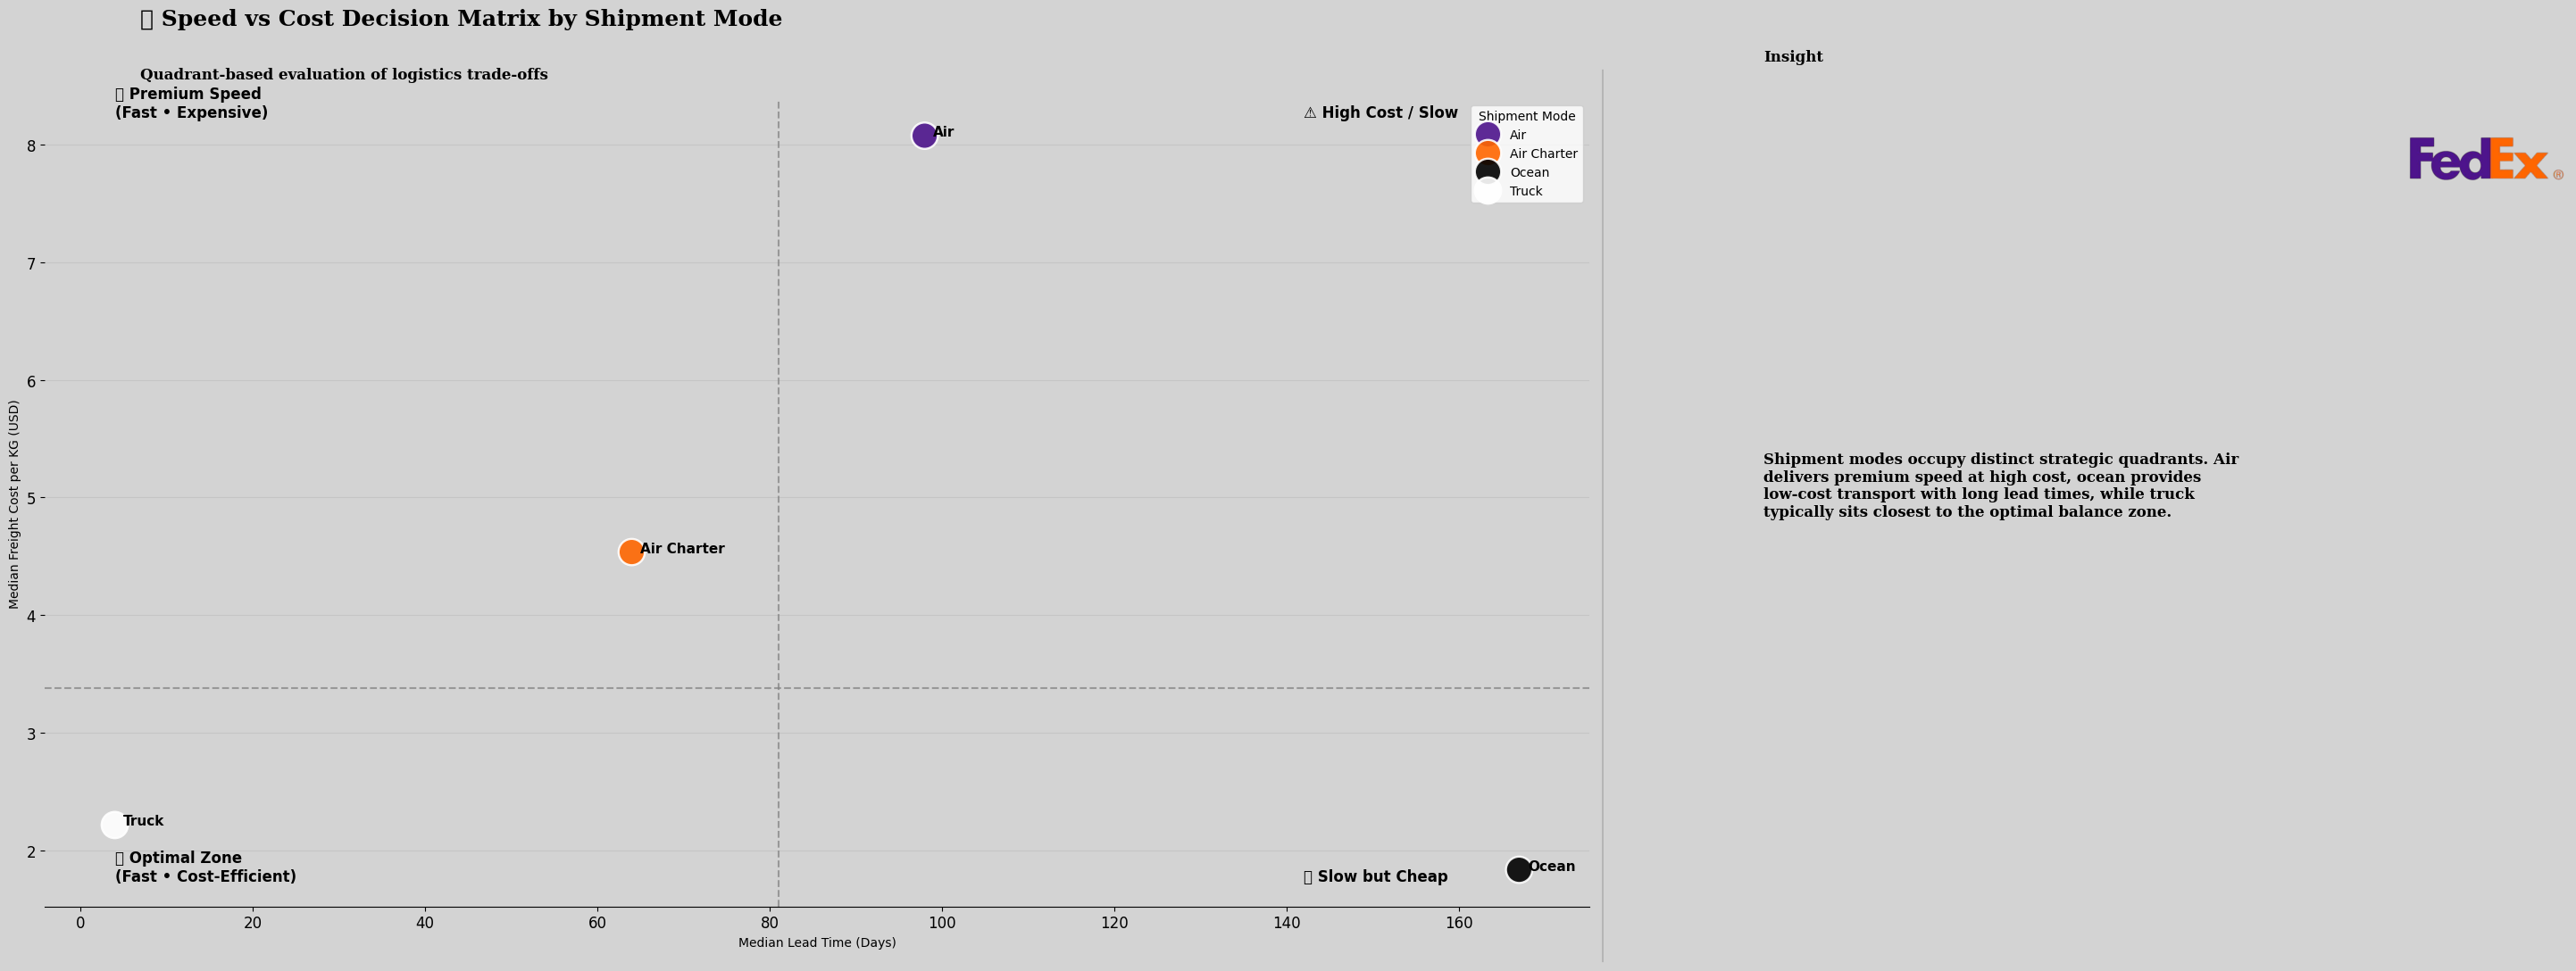

In [84]:
# 1. Data preparation
tradeoff_df = (
    fed_ex
    .groupby('Shipment Mode')
    .agg(
        median_lead_time=('lead_time_days', 'median'),
        median_cost_per_kg=('freight_cost_per_kg', 'median'),
        shipment_volume=('ID', 'nunique')
    )
    .reset_index()
)

# Calculate medians for quadrant split
lead_time_ref = tradeoff_df['median_lead_time'].median()
cost_ref = tradeoff_df['median_cost_per_kg'].median()

# 2. Create figure
fig, ax = plt.subplots(figsize=(18, 10))

# 3. Scatter plot (no bubble size — clarity > decoration)
sns.scatterplot(
    data=tradeoff_df,
    x='median_lead_time',
    y='median_cost_per_kg',
    hue='Shipment Mode',
    palette=palette,
    s=450,
    alpha=0.9,
    ax=ax
)

# 4. Quadrant reference lines
ax.axvline(lead_time_ref, linestyle='--', color='gray', alpha=0.7)
ax.axhline(cost_ref, linestyle='--', color='gray', alpha=0.7)

# 5. Quadrant labels
ax.text(
    tradeoff_df['median_lead_time'].min(),
    tradeoff_df['median_cost_per_kg'].max() * 1.02,
    '🚀 Premium Speed\n(Fast • Expensive)',
    fontsize=12,
    fontweight='bold'
)

ax.text(
    tradeoff_df['median_lead_time'].max() * 0.85,
    tradeoff_df['median_cost_per_kg'].max() * 1.02,
    '⚠ High Cost / Slow',
    fontsize=12,
    fontweight='bold'
)

ax.text(
    tradeoff_df['median_lead_time'].min(),
    tradeoff_df['median_cost_per_kg'].min() * 0.95,
    '⭐ Optimal Zone\n(Fast • Cost-Efficient)',
    fontsize=12,
    fontweight='bold'
)

ax.text(
    tradeoff_df['median_lead_time'].max() * 0.85,
    tradeoff_df['median_cost_per_kg'].min() * 0.95,
    '🐢 Slow but Cheap',
    fontsize=12,
    fontweight='bold'
)

# 6. Label each point
for _, row in tradeoff_df.iterrows():
    ax.text(
        row['median_lead_time'] + 1,
        row['median_cost_per_kg'],
        row['Shipment Mode'],
        fontsize=11,
        fontweight='bold'
    )

# 7. Styling
apply_chart_styling(
    ax=ax,
    fig=fig,
    title='⚖️ Speed vs Cost Decision Matrix by Shipment Mode',
    subtitle='Quadrant-based evaluation of logistics trade-offs',
    insight_text=(
        "Shipment modes occupy distinct strategic quadrants. "
        "Air delivers premium speed at high cost, ocean provides low-cost "
        "transport with long lead times, while truck typically sits closest "
        "to the optimal balance zone."
    )
)

# 8. Axis labels
ax.set_xlabel('Median Lead Time (Days)')
ax.set_ylabel('Median Freight Cost per KG (USD)')
ax.legend(title='Shipment Mode')

plt.tight_layout()
plt.show()


#### Lead Time Trend by Shipment Mode

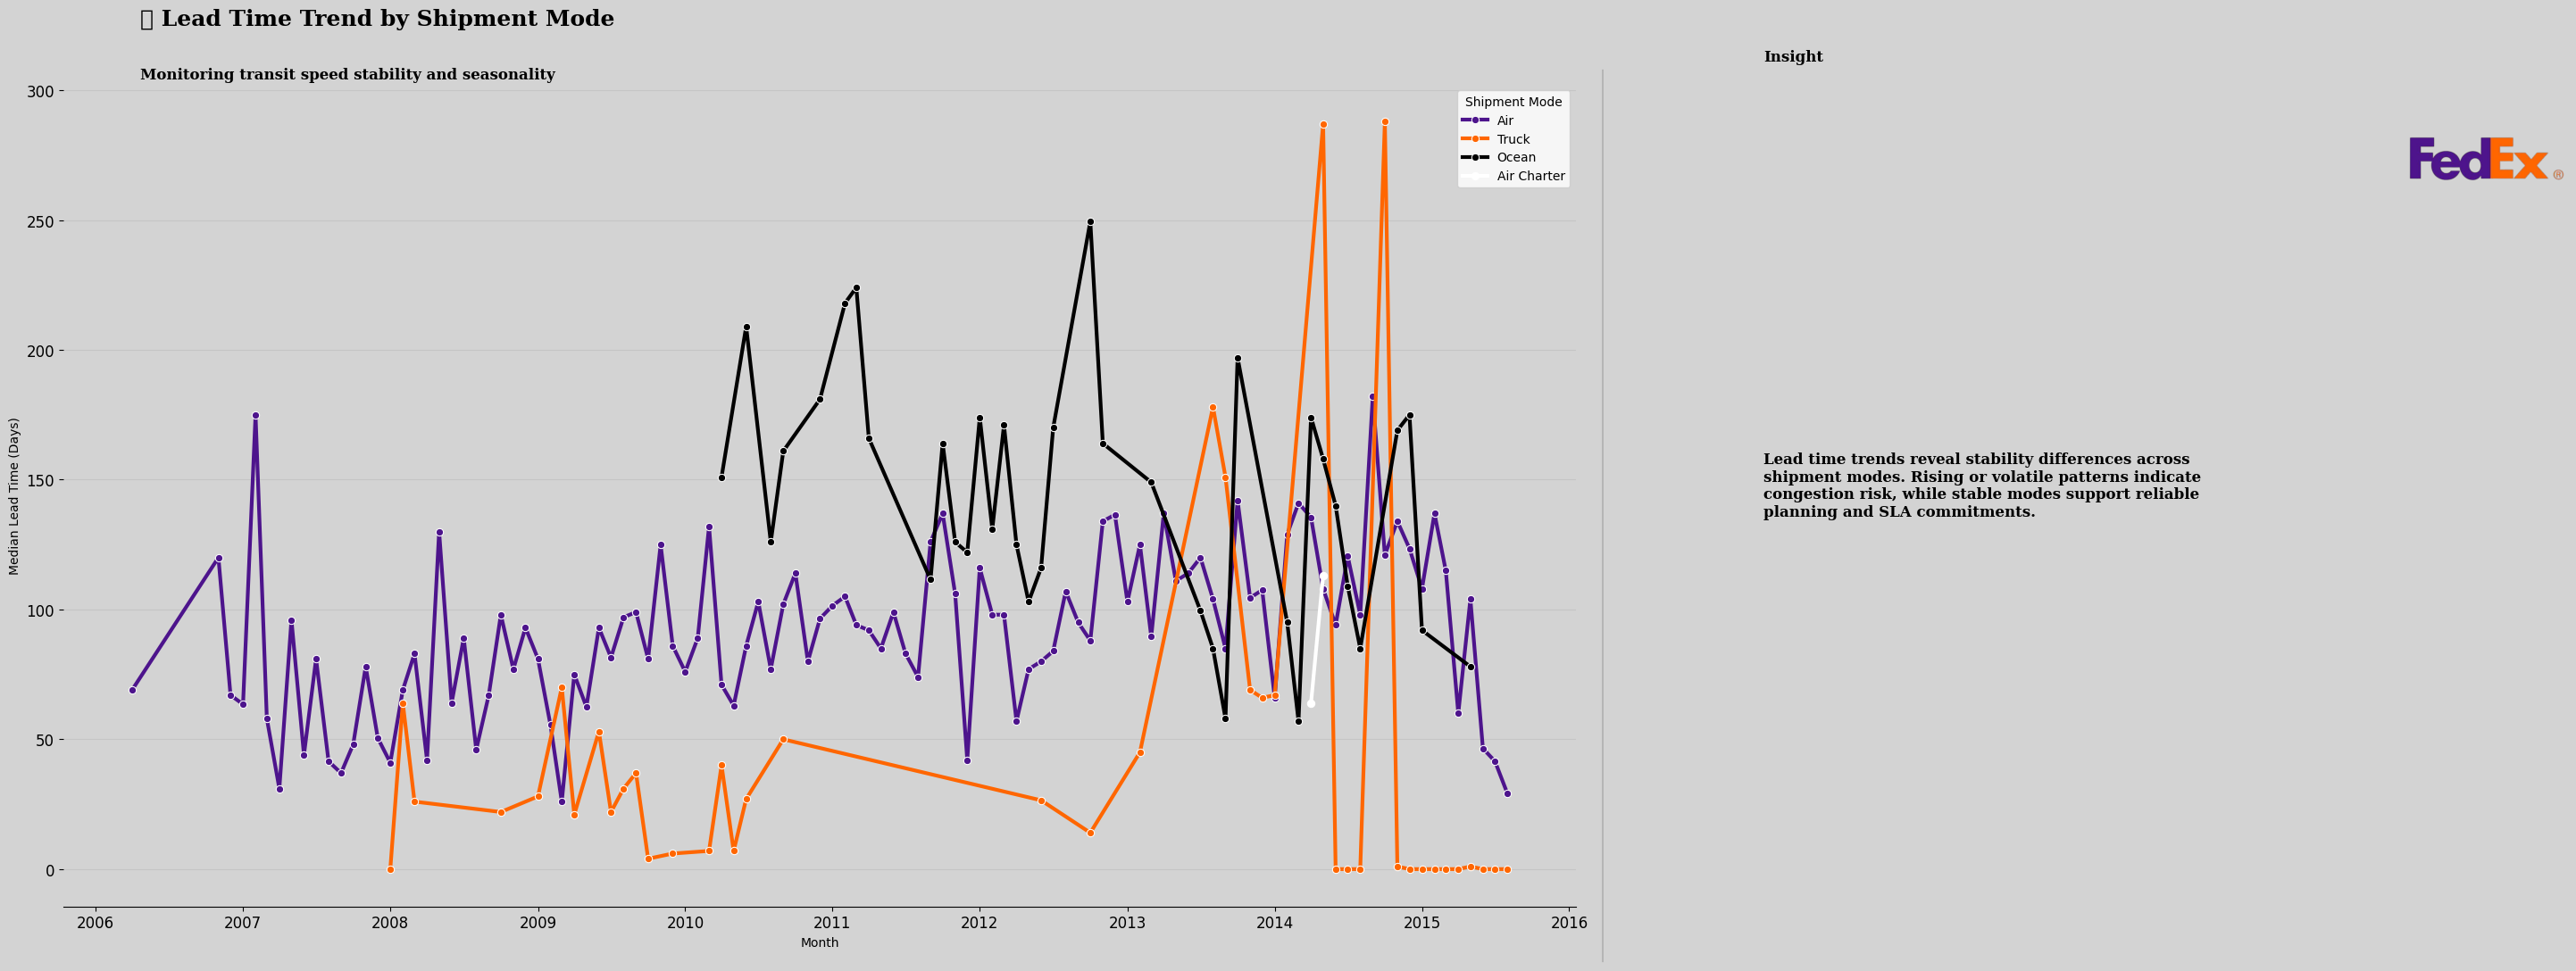

In [85]:
## 1. Data preparation
# Create lead_month column
fed_ex['lead_month'] = fed_ex['po_sent_date'].dt.to_period('M')

lead_time_trend = (
    fed_ex
    .groupby(['lead_month', 'Shipment Mode'])
    .agg(
        median_lead_time=('lead_time_days', 'median'),
        shipment_count=('ID', 'nunique')
    )
    .reset_index()
)

# Convert 'lead_month' from Period to Timestamp for plotting compatibility
lead_time_trend['lead_month'] = lead_time_trend['lead_month'].dt.to_timestamp()

# 2. Create figure
fig, ax = plt.subplots(figsize=(18, 10))

# 3. Plot
sns.lineplot(
    data=lead_time_trend,
    x='lead_month',
    y='median_lead_time',
    hue='Shipment Mode',
    palette=palette,
    linewidth=3,
    marker='o',
    ax=ax
)

# 4. Apply styling
apply_chart_styling(
    ax=ax,
    fig=fig,
    title='⏱ Lead Time Trend by Shipment Mode',
    subtitle='Monitoring transit speed stability and seasonality',
    insight_text=(
        "Lead time trends reveal stability differences across shipment modes. "
        "Rising or volatile patterns indicate congestion risk, "
        "while stable modes support reliable planning and SLA commitments."
    )
)

# 5. Axis labels
ax.set_xlabel('Month')
ax.set_ylabel('Median Lead Time (Days)')
ax.legend(title='Shipment Mode')

# 6. Layout
plt.tight_layout()
plt.show()

### 🎯 Section 5: Decision Support and Risk 🎯


#### Vendor Performance Risk Matrix

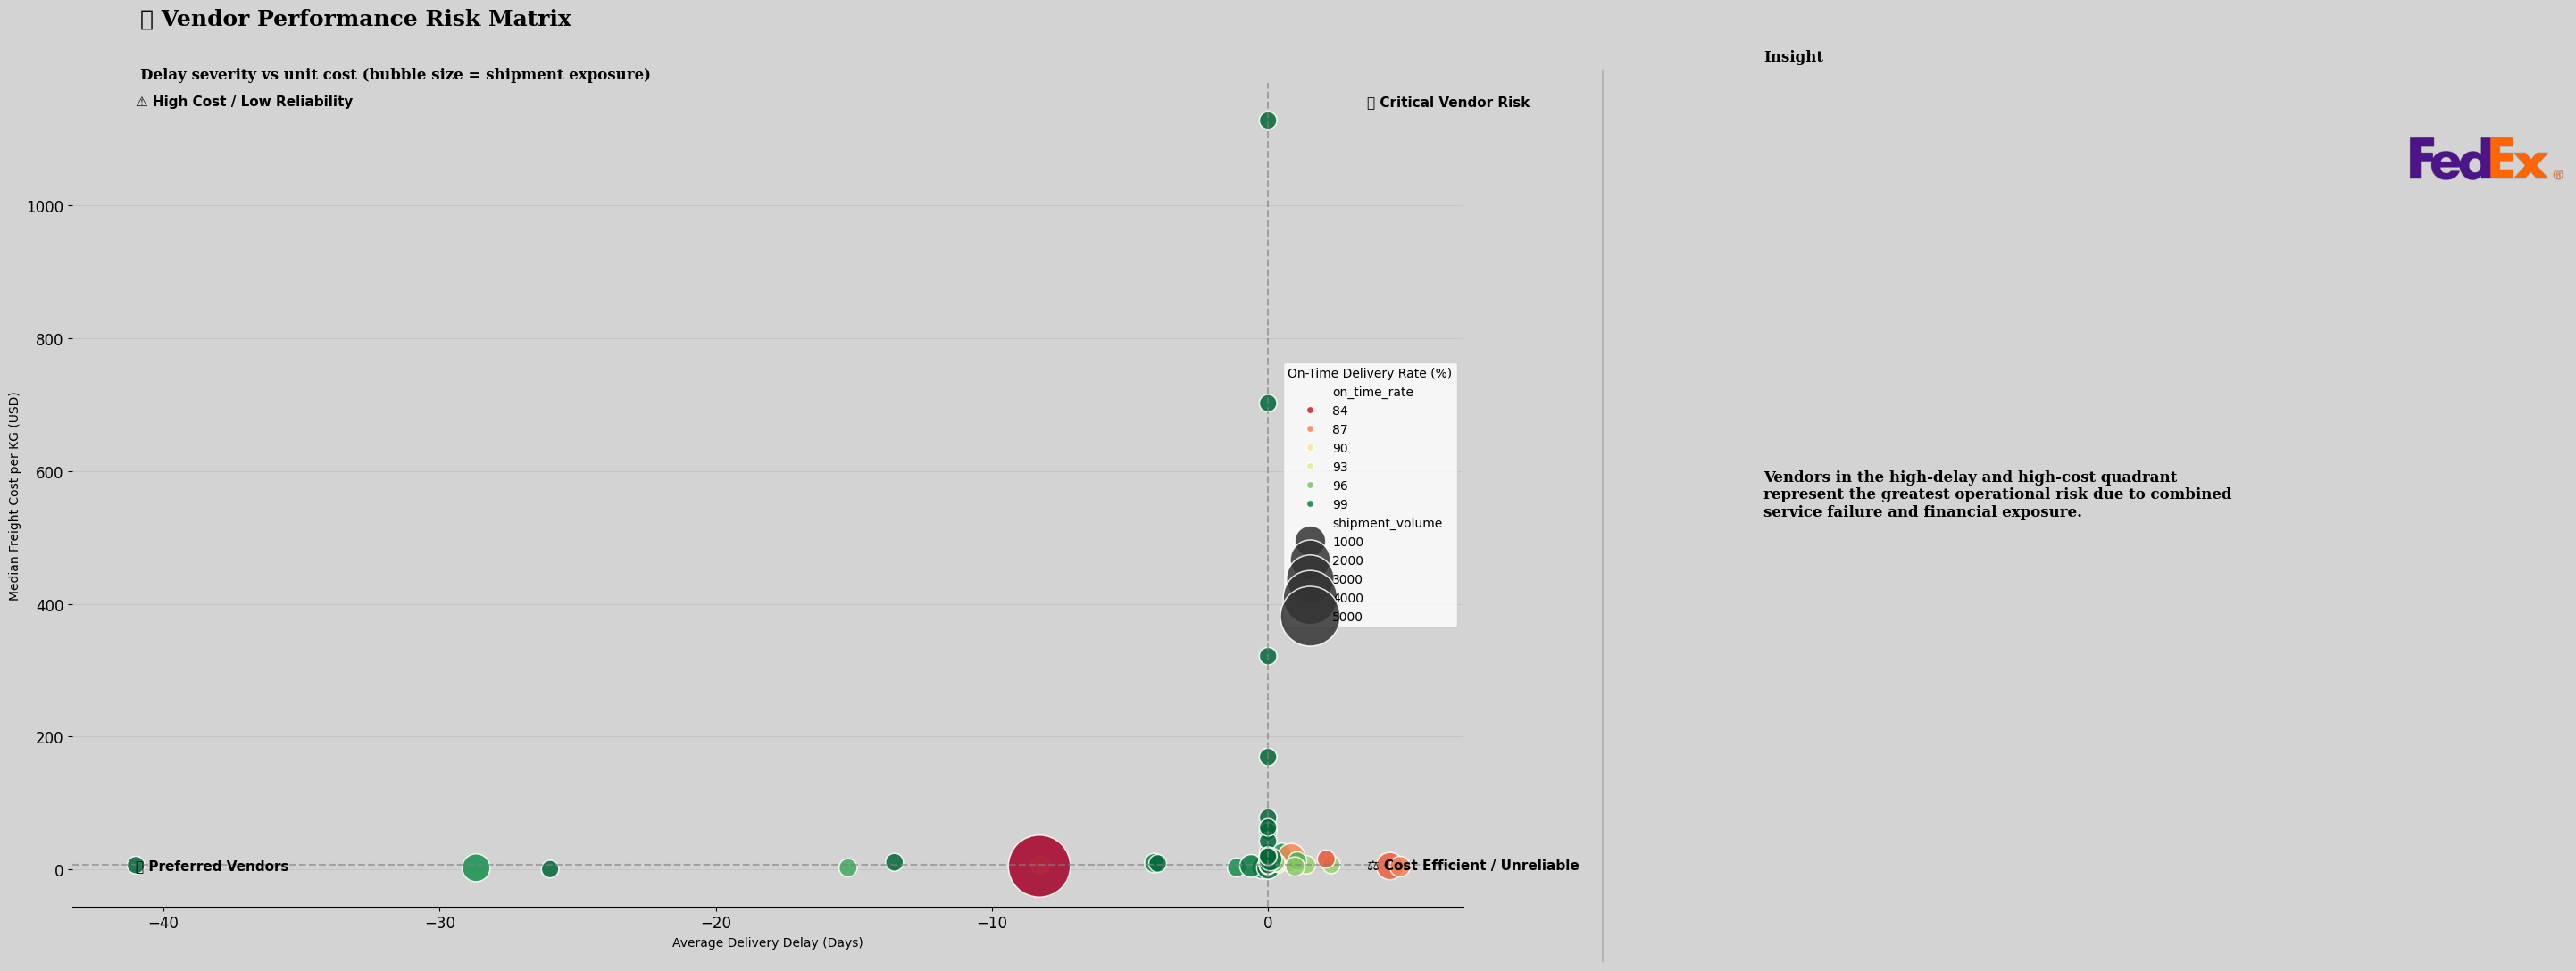

In [86]:
# 1. Data preparation
vendor_perf = (
    fed_ex
    .groupby('Vendor')
    .agg(
        avg_delay=('delivery_delay_days', 'mean'),
        median_cost_per_kg=('freight_cost_per_kg', 'median'),
        shipment_volume=('ID', 'nunique'),
        on_time_rate=('on_time_flag', 'mean')
    )
    .reset_index()
)

# Convert on-time rate to percentage
vendor_perf['on_time_rate'] *= 100

# Reference thresholds (median-based)
delay_ref = vendor_perf['avg_delay'].median()
cost_ref = vendor_perf['median_cost_per_kg'].median()

# 2. Create figure
fig, ax = plt.subplots(figsize=(18, 10))

# 3. Scatter plot
sns.scatterplot(
    data=vendor_perf,
    x='avg_delay',
    y='median_cost_per_kg',
    size='shipment_volume',
    hue='on_time_rate',
    palette='RdYlGn',
    sizes=(200, 2500),
    alpha=0.85,
    ax=ax
)

# 4. Reference lines
ax.axvline(delay_ref, linestyle='--', color='gray', alpha=0.6)
ax.axhline(cost_ref, linestyle='--', color='gray', alpha=0.6)

# 5. Quadrant annotations
ax.text(
    vendor_perf['avg_delay'].min(),
    vendor_perf['median_cost_per_kg'].max() * 1.02,
    '⚠ High Cost / Low Reliability',
    fontsize=11,
    fontweight='bold'
)

ax.text(
    vendor_perf['avg_delay'].max() * 0.75,
    vendor_perf['median_cost_per_kg'].max() * 1.02,
    '🚨 Critical Vendor Risk',
    fontsize=11,
    fontweight='bold'
)

ax.text(
    vendor_perf['avg_delay'].min(),
    vendor_perf['median_cost_per_kg'].min() * 0.95,
    '⭐ Preferred Vendors',
    fontsize=11,
    fontweight='bold'
)

ax.text(
    vendor_perf['avg_delay'].max() * 0.75,
    vendor_perf['median_cost_per_kg'].min() * 0.95,
    '⚖ Cost Efficient / Unreliable',
    fontsize=11,
    fontweight='bold'
)

# 6. Styling
apply_chart_styling(
    ax=ax,
    fig=fig,
    title='🏭 Vendor Performance Risk Matrix',
    subtitle='Delay severity vs unit cost (bubble size = shipment exposure)',
    insight_text=(
        "Vendors in the high-delay and high-cost quadrant represent the "
        "greatest operational risk due to combined service failure and "
        "financial exposure."
    )
)

# 7. Axis labels
ax.set_xlabel('Average Delivery Delay (Days)')
ax.set_ylabel('Median Freight Cost per KG (USD)')
ax.legend(title='On-Time Delivery Rate (%)')

# 8. Layout
plt.tight_layout()
plt.show()

#### Fulfillment Method Performance Comparison

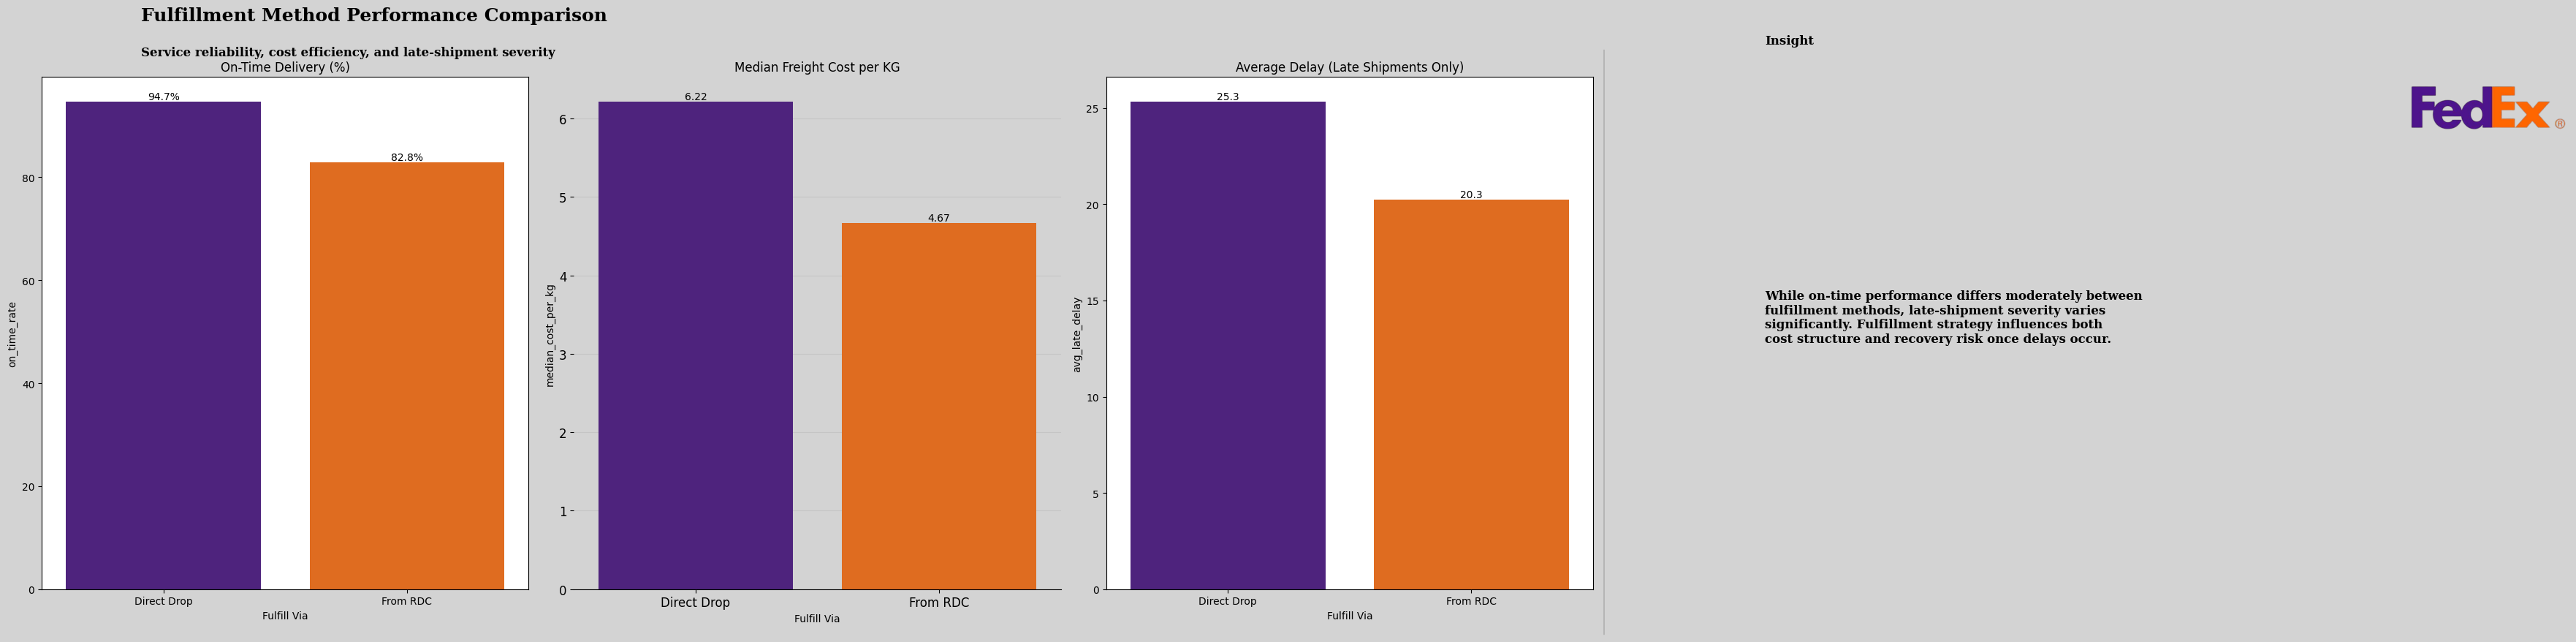

In [87]:
fulfillment_perf = (
    fed_ex
    .groupby('Fulfill Via')
    .agg(
        on_time_rate=('on_time_flag', 'mean'),
        avg_late_delay=('delivery_delay_days', lambda x: x[x > 0].mean()),
        median_cost_per_kg=('freight_cost_per_kg', 'median'),
        shipment_volume=('ID', 'nunique')
    )
    .reset_index()
)

fulfillment_perf['on_time_rate'] *= 100

fig, axes = plt.subplots(1, 3, figsize=(22, 8))

# On-time %
bars0 = sns.barplot(
    data=fulfillment_perf,
    x='Fulfill Via',
    y='on_time_rate',
    palette=palette,
    ax=axes[0]
)
axes[0].set_title('On-Time Delivery (%)')
# Add percentage labels to On-Time Delivery (%) chart
for bar in bars0.patches:
    axes[0].annotate(f'{bar.get_height():.1f}%',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black')

# Cost
bars1 = sns.barplot(
    data=fulfillment_perf,
    x='Fulfill Via',
    y='median_cost_per_kg',
    palette=palette,
    ax=axes[1]
)
axes[1].set_title('Median Freight Cost per KG')
# Add numerical labels to Median Freight Cost per KG chart
for bar in bars1.patches:
    axes[1].annotate(f'{bar.get_height():.2f}',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black')

# Delay severity (late only)
bars2 = sns.barplot(
    data=fulfillment_perf,
    x='Fulfill Via',
    y='avg_late_delay',
    palette=palette,
    ax=axes[2]
)
axes[2].set_title('Average Delay (Late Shipments Only)')
# Add numerical labels to Average Delay (Late Shipments Only) chart
for bar in bars2.patches:
    axes[2].annotate(f'{bar.get_height():.1f}',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black')

apply_chart_styling(
    ax=axes[1],
    fig=fig,
    title='Fulfillment Method Performance Comparison',
    subtitle='Service reliability, cost efficiency, and late-shipment severity',
    insight_text=(
        "While on-time performance differs moderately between fulfillment methods, "
        "late-shipment severity varies significantly. Fulfillment strategy influences "
        "both cost structure and recovery risk once delays occur."
    )
)

plt.tight_layout()
plt.show()

## 5. ***Solution to Business Objective***




Based on the logistics performance analysis, the client should focus on the following actions:













1.   Optimize shipment mode selection by aligning speed, cost, and reliability with shipment urgency and value.
2.   Improve delivery reliability by targeting high-delay modes, routes, and vendors that drive the majority of service failures.
3. Reduce freight cost inefficiencies by monitoring cost-to-value thresholds and correcting high-cost outlier shipments.
4. Strengthen vendor governance through performance-based segmentation and volume reallocation from high-risk partners.
5. Prioritize high-impact countries and routes where cumulative delay exposure is greatest.
6. Adopt a balanced fulfillment strategy that combines cost efficiency with service reliability based on shipment criticality.



# Conclusions

The analysis shows that logistics inefficiencies are systemic rather than isolated.
By applying data-driven decisions across shipment modes, vendors, geographies, and fulfillment methods, the client can improve on-time performance, reduce cost leakage, and minimize operational risk.

Implementing these recommendations will enable a more reliable, cost-efficient, and resilient logistics network aligned with business and customer expectations.

## 💼 Business Implications

The analysis highlights several operational inefficiencies that have direct financial and strategic consequences for the business. These issues impact profitability, service quality, and long-term customer retention.

---

## 📉 Revenue & Profit Impact

* **High delivery delays increase operating costs** through re-handling, expediting, customer escalations, and SLA penalties.
* Shipments exceeding the **freight cost–to–value threshold** directly erode gross margins, especially for low-value or high-weight goods.
* Premium shipment modes used without urgency justification result in **unnecessary cost premiums**, reducing overall logistics profitability.

---

## 💸 Cost Leakage Risks

* Significant variability in freight cost per kilogram indicates **unstable carrier pricing and contract inefficiencies**.
* Outlier shipments with disproportionate freight costs represent recurring **hidden cost leakage** not visible through average metrics.
* Lack of standardized mode-selection rules leads to inconsistent routing decisions and inflated transportation spend.

---

## ⚠️ Operational Risk Exposure

* A small number of countries and routes contribute a **disproportionate share of total delay days**, increasing network vulnerability.
* High-delay, high-cost vendors amplify operational risk when they also handle large shipment volumes.
* Once shipments are delayed, **delay severity is often extreme**, increasing recovery cost and customer dissatisfaction.

---

## 📦 Customer Experience & Retention Risk

* Poor delivery reliability negatively impacts customer trust, particularly for time-sensitive or high-value shipments.
* Repeated late deliveries increase the likelihood of contract loss, reduced order volumes, and penalty clauses.
* Inconsistent fulfillment performance weakens service-level commitments and brand reliability.

---

## 📈 Opportunity for Financial Improvement

By addressing the identified inefficiencies, the organization can:

* Reduce freight cost leakage through better mode and vendor selection  
* Improve margin protection by enforcing cost-to-value thresholds  
* Lower delay-related operational expenses  
* Improve delivery predictability and SLA compliance  
* Increase long-term customer retention and lifetime value  

